# Анализ продаж автомобилей в Казахстане за 2019 год                                  
                                  
                                           Задачи:


- Предобработка данных;

- Исследовательский анализ данных;

- Анализ рынка автомобилей Казахстана;

- Анализ позиции Меркур Авто: внутренная и внешняя среда.

# Чтение данных

Импортируем библиотеку pandas. Считаем данные из csv-файла в датафрейм и сохраним в переменную

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn 
import seaborn as sns
import numpy as np
plt.style.use("ggplot")

In [2]:
df = pd.read_csv('auto_kz_2019.csv', sep=";")
df

,Год,Месяц,Компания,Бренд,Модель,Модификация,Год выпуска,Страна-производитель,Вид топлива,"Объём двиг, л,",...,Тип клиента,Форма расчета,Количество,"Цена, USD","Продажа, USD",Область,Сегментация 2013,Класс 2013,Сегментация Eng,Локализация производства
0,2019,Май,Mercur Auto,Audi,A3,TFSI,2018,Германия,Бензин,"1,4",...,Физ. Лицо,безналичный,1.0,28115,28115,г.Алматы,Легковые автомобили,C класс,C,Импорт
1,2019,Август,Mercur Auto,Audi,A3,TFSI,2018,Германия,Бензин,"1,4",...,Юр. Лицо,наличный,1.0,"32246,99","32246,99",г.Алматы,Легковые автомобили,C класс,C,Импорт
2,2019,Апрель,Mercur Auto,Audi,A4,TFSI,2018,Германия,Бензин,"1,4",...,Физ. Лицо,безналичный,1.0,32000,32000,г.Алматы,Легковые автомобили,D класс,D,Импорт
3,2019,Июль,Mercur Auto,Audi,A4,TFSI,2018,Германия,Бензин,"1,4",...,Юр. Лицо,безналичный,1.0,31929,31929,г.Алматы,Легковые автомобили,D класс,D,Импорт
4,2019,Июль,Mercur Auto,Audi,A4,TFSI,2018,Германия,Бензин,"1,4",...,Физ. Лицо,наличный,1.0,31929,31929,г.Алматы,Легковые автомобили,D класс,D,Импорт
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39961,2019,Сентябрь,ТК КАМАЗ,KAMAZ,58815Z,KAMAZ 58815Z,2019,Республика Казахстан,Дизель,NaN,...,Юр. Лицо,Безналичная,1.0,"48756,92071","48756,92071",Актюбинская область,Коммерческие автомобили,Крупнотоннажные грузовики,O,Локальное производство
39962,2019,Сентябрь,ТК КАМАЗ,KAMAZ,58815Z,KAMAZ 58815Z,2019,Республика Казахстан,Дизель,NaN,...,Юр. Лицо,Безналичная,1.0,"48756,92071","48756,92071",Актюбинская область,Коммерческие автомобили,Крупнотоннажные грузовики,O,Локальное производство
39963,2019,Сентябрь,ТК КАМАЗ,KAMAZ,58815Z,KAMAZ 58815Z,2019,Республика Казахстан,Дизель,NaN,...,Юр. Лицо,Безналичная,1.0,"48756,92071","48756,92071",Актюбинская область,Коммерческие автомобили,Крупнотоннажные грузовики,O,Локальное производство
39964,2019,Сентябрь,ТК КАМАЗ,KAMAZ,58815Z,KAMAZ 58815Z,2019,Республика Казахстан,Дизель,NaN,...,Юр. Лицо,Безналичная,1.0,"48756,92071","48756,92071",Актюбинская область,Коммерческие автомобили,Крупнотоннажные грузовики,O,Локальное производство


In [3]:
df.columns = df.columns.str.lower()

In [4]:
df.isna().mean().sort_values(ascending=False)

форма расчета                     0.648751
тип клиента                       0.176325
сегмент                           0.169169
тип привода                       0.107316
объём двиг, л,                    0.106541
модификация                       0.089851
коробка передач                   0.081444
вид топлива                       0.078567
год выпуска                       0.012536
количество                        0.000150
сегментация eng                   0.000000
класс 2013                        0.000000
сегментация 2013                  0.000000
область                           0.000000
продажа, usd                      0.000000
цена, usd                         0.000000
год                               0.000000
наименование дилерского центра    0.000000
регион                            0.000000
месяц                             0.000000
страна-производитель              0.000000
модель                            0.000000
бренд                             0.000000
компания   

In [5]:
pd.DataFrame(df.isna().mean().to_frame(name='Пропуски').query('Пропуски > 0')['Пропуски'])\
            .style.background_gradient('coolwarm')\
            .format({'Пропуски':'{:.0%}'})

,Пропуски
модификация,9%
год выпуска,1%
вид топлива,8%
"объём двиг, л,",11%
коробка передач,8%
тип привода,11%
сегмент,17%
тип клиента,18%
форма расчета,65%
количество,0%


In [6]:
df = df.fillna(0)

In [7]:
df.dtypes

год                                 int64
месяц                              object
компания                           object
бренд                              object
модель                             object
модификация                        object
год выпуска                        object
страна-производитель               object
вид топлива                        object
объём двиг, л,                     object
коробка передач                    object
тип привода                        object
сегмент                            object
регион                             object
наименование дилерского центра     object
тип клиента                        object
форма расчета                      object
количество                        float64
цена, usd                          object
продажа, usd                       object
область                            object
сегментация 2013                   object
класс 2013                         object
сегментация eng                   

In [8]:
df

,год,месяц,компания,бренд,модель,модификация,год выпуска,страна-производитель,вид топлива,"объём двиг, л,",...,тип клиента,форма расчета,количество,"цена, usd","продажа, usd",область,сегментация 2013,класс 2013,сегментация eng,локализация производства
0,2019,Май,Mercur Auto,Audi,A3,TFSI,2018,Германия,Бензин,"1,4",...,Физ. Лицо,безналичный,1.0,28115,28115,г.Алматы,Легковые автомобили,C класс,C,Импорт
1,2019,Август,Mercur Auto,Audi,A3,TFSI,2018,Германия,Бензин,"1,4",...,Юр. Лицо,наличный,1.0,"32246,99","32246,99",г.Алматы,Легковые автомобили,C класс,C,Импорт
2,2019,Апрель,Mercur Auto,Audi,A4,TFSI,2018,Германия,Бензин,"1,4",...,Физ. Лицо,безналичный,1.0,32000,32000,г.Алматы,Легковые автомобили,D класс,D,Импорт
3,2019,Июль,Mercur Auto,Audi,A4,TFSI,2018,Германия,Бензин,"1,4",...,Юр. Лицо,безналичный,1.0,31929,31929,г.Алматы,Легковые автомобили,D класс,D,Импорт
4,2019,Июль,Mercur Auto,Audi,A4,TFSI,2018,Германия,Бензин,"1,4",...,Физ. Лицо,наличный,1.0,31929,31929,г.Алматы,Легковые автомобили,D класс,D,Импорт
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39961,2019,Сентябрь,ТК КАМАЗ,KAMAZ,58815Z,KAMAZ 58815Z,2019,Республика Казахстан,Дизель,0,...,Юр. Лицо,Безналичная,1.0,"48756,92071","48756,92071",Актюбинская область,Коммерческие автомобили,Крупнотоннажные грузовики,O,Локальное производство
39962,2019,Сентябрь,ТК КАМАЗ,KAMAZ,58815Z,KAMAZ 58815Z,2019,Республика Казахстан,Дизель,0,...,Юр. Лицо,Безналичная,1.0,"48756,92071","48756,92071",Актюбинская область,Коммерческие автомобили,Крупнотоннажные грузовики,O,Локальное производство
39963,2019,Сентябрь,ТК КАМАЗ,KAMAZ,58815Z,KAMAZ 58815Z,2019,Республика Казахстан,Дизель,0,...,Юр. Лицо,Безналичная,1.0,"48756,92071","48756,92071",Актюбинская область,Коммерческие автомобили,Крупнотоннажные грузовики,O,Локальное производство
39964,2019,Сентябрь,ТК КАМАЗ,KAMAZ,58815Z,KAMAZ 58815Z,2019,Республика Казахстан,Дизель,0,...,Юр. Лицо,Безналичная,1.0,"48756,92071","48756,92071",Актюбинская область,Коммерческие автомобили,Крупнотоннажные грузовики,O,Локальное производство


In [9]:
df['продажа, usd'] = df['продажа, usd'].apply(lambda x: x.replace(',', '.'))
df['цена, usd'] = df['цена, usd'].apply(lambda x: x.replace(',', '.'))

In [10]:
df['количество'] = df['количество'].astype('int')

In [11]:
df['продажа, usd'] = df['продажа, usd'].astype('float')

In [12]:
df['продажа, usd'] = df['продажа, usd'].round(0)

In [13]:
df['продажа, usd'] = df['продажа, usd'].astype('int')

In [14]:
df['цена, usd'] = df['цена, usd'].astype('float')

In [15]:
df['цена, usd'] = df['цена, usd'].astype('int')

In [16]:
df['цена, usd'] = df['цена, usd'].round(0)

In [17]:
df.describe().round(1)

,год,количество,"цена, usd","продажа, usd"
count,39966.0,39966.0,39966.0,39966.0
mean,2019.0,1.3,28249.7,33757.7
std,0.0,2.4,20005.7,50702.5
min,2019.0,-1.0,7100.0,-35588.0
25%,2019.0,1.0,15518.0,16602.0
50%,2019.0,1.0,24282.0,26249.0
75%,2019.0,1.0,32505.0,35000.0
max,2019.0,115.0,328510.0,3778206.0


Количество явных дубликатов

In [18]:
df.duplicated().sum()

18707

In [19]:
df = df.drop_duplicates().reset_index(drop=True)

                                    Исследовательский анализ данных

Рассмотрим каждый столбец в отдельности 

In [20]:
df.columns

Index(['год', 'месяц', 'компания', 'бренд', 'модель', 'модификация',
       'год выпуска', 'страна-производитель', 'вид топлива', 'объём двиг, л,',
       'коробка передач', 'тип привода', 'сегмент', 'регион',
       'наименование дилерского центра', 'тип клиента', 'форма расчета',
       'количество', 'цена, usd', 'продажа, usd', 'область',
       'сегментация 2013', 'класс 2013', 'сегментация eng',
       'локализация производства'],
      dtype='object')

In [21]:
df['месяц'].value_counts(dropna=False)

Май         2636
Апрель      2626
Июль        2620
Июнь        2545
Август      2484
Сентябрь    2473
Март        2171
Февраль     1865
Январь      1839
Name: месяц, dtype: int64

In [22]:
df['компания'].value_counts(dropna=False)

Toyota Motor Kazakhstan          4450
Astana Motors                    3740
БИПЭК АВТО                       3599
Вираж                            2017
Astana Motors                    1271
Renault Россия                   1193
Nissan Manufacturing RUS         1110
Allur Auto                        646
ММС Рус                           384
Mercur Auto                       382
Subaru Kazakhstan                 333
ТК КАМАЗ                          328
Автоцентр-Бавария                 224
Равон Моторс Казахстан            203
Ravon Motors Kazakstan            184
Лифан Моторс Рус                  137
Автомир ГК                        110
Volkswagen Group Rus              100
СемАЗ                              91
Almaty Motors Premium              90
Hyundai Com Trans Kazakhstan       89
Autokapital                        85
УзАвто-Казахстан                   74
Eurasia Motor Premium              71
TERRA MOTORS                       63
Автодом Motors KST                 49
Scandinavian

In [23]:
set(df['компания'].unique())

{'Allur Auto',
 'Almaty Motors Premium',
 'Astana Motors',
 'Astana Motors ',
 'Autokapital',
 'Caspian Motors',
 'Daewoo Bus Kazakhstan',
 'Eurasia Motor Premium',
 'Hino Motors ',
 'Hyundai Com Trans Kazakhstan ',
 'MAN Truck & Bus Kazakhstan',
 'MMC RUS',
 'Mercur Auto',
 'Mercur Autos',
 'Nissan Manufacturing RUS',
 'Ravon Motors Kazakstan',
 'Renault Россия',
 'Scandinavian Motors',
 'Scania Central Asia',
 'Subaru Kazakhstan',
 'TERRA MOTORS',
 'Toyota Motor Kazakhstan',
 'Volkswagen Group Rus',
 'Автодом Motors KST',
 'Автокапитал',
 'Автомир ГК',
 'Автомир-Центр',
 'Автоцентр-Бавария',
 'БИПЭК АВТО',
 'Вираж',
 'Каспиан Моторс',
 'Лифан Моторс Рус',
 'ММС Рус',
 'Равон Моторс Казахстан',
 'СВС-ТРАНС',
 'СемАЗ',
 'ТК КАМАЗ',
 'ТОО "Eurasia Motor Zhaik"',
 'УзАвто-Казахстан',
 'Хино Моторс Казахстан'}

Исправлю задвоения названий

In [24]:
df = df.replace('Ravon Motors Kazakstan','Равон Моторс Казахстан')
df = df.replace('Mercur Autos','Mercur Auto')
df = df.replace('Astana Motors','Astana Motors')
df = df.replace('Autokapital','Автокапитал')
df = df.replace('Caspian Motors','Каспиан Моторс')
df = df.replace('Hino Motors','Хино Моторс Казахстан')
df = df.replace('MMC RUS','ММС Рус')
df = df.replace('Ravon Motors Kazakstan','Равон Моторс Казахстан')

In [25]:
df['бренд'].value_counts(dropna=False)

Hyundai                 5010
Toyota                  3779
Lada                    1962
GAZ                     1361
Renault                 1193
Nissan                  1042
Kia                      823
UAZ                      783
Lexus                    671
Jac                      522
Volkswagen               484
Ravon                    471
Mitsubishi               386
Skoda                    370
Chevrolet                341
Subaru                   334
KAMAZ                    327
BMW                      209
Lifan                    137
Land Rover               118
Mazda                    110
Mercedes-Benz             94
Hyundai Truck & Bus       89
Infiniti                  68
ANKAI                     67
Porsche                   52
Audi                      48
Cadillac                  47
Shacman                   41
Volvo                     40
Hino                      38
Jaguar                    35
Isuzu                     35
Peugeot                   29
Foton         

In [26]:
df['модель'].value_counts(dropna=False)

Tucson      1375
Accent      1254
Camry       1173
Creta       1054
LC Prado     760
            ... 
XE             1
F-Type         1
iev            1
RS5            1
58815Z         1
Name: модель, Length: 273, dtype: int64

In [27]:
df = df.replace('3 серия','3')
df = df.replace('6 серия','6')

In [28]:
df['модификация'].value_counts(dropna=False).head(50)

0                                                          3264
Hyundai Tucson ix35 FL Comfort                              296
54                                                          289
Hyundai Tucson ix35 FL Travel                               281
легковой                                                    279
B5                                                          214
BX                                                          202
Comfort                                                     201
Hyundai Elantra AD FL Active                                200
Subaru Forester                                             176
55                                                          175
NH                                                          171
Hyundai Tucson ix35 FL Prime                                165
B4                                                          159
Hyundai Tucson ix35 FL  Comfort                             154
SE+                                     

In [29]:
df['год выпуска'].value_counts(dropna=False)

2019     14921
2018      5417
2 019      241
0          231
2 018      226
2017       190
2016        29
2014         2
2013         1
2011         1
Name: год выпуска, dtype: int64

In [30]:
df = df.replace('2 019','2019')
df = df.replace('2 018','2018')

In [31]:
df['страна-производитель'].value_counts(dropna=False)

Республика Казахстан    10451
Российская Федерация     6572
Япония                   2554
Турция                    449
Таиланд                   392
США                       257
Германия                  252
UK                        179
Австрия                    33
Узбекистан                 30
Китай                      22
Корея                      16
Швеция                     16
Нидерланды                 12
Испания                     9
Польша                      6
Бельгия                     6
Венгрия                     2
Белоруссия                  1
Name: страна-производитель, dtype: int64

In [32]:
df['вид топлива'].value_counts(dropna=False)

Бензин           18609
0                 1887
Дизель             644
бензин              66
2                   16
1,6                 11
гибрид              10
дизель               9
0                    3
Электро              3
Электричество        1
Name: вид топлива, dtype: int64

In [33]:
df = df.replace('бензин ','Бензин')
df = df.replace('дизель ','Дизель')
df = df.replace('Электро','Электричество')

In [34]:
df['коробка передач'].value_counts(dropna=False).head(20)

AT                4418
6 AT              4328
0                 1878
Мех.              1506
MT                1504
CVT               1183
5МТ                993
CVT (вариатор)     690
6AT                653
5 МТ               617
AMT                395
6АТ                378
5MT                363
6 АТ               348
АКПП               226
4АТ                133
АКП                121
CVT(вAриATор)      120
8AT                119
4 АТ               104
Name: коробка передач, dtype: int64

In [35]:
df = df.replace('CVT(вAриATор)','CVT (вариатор)')
df = df.replace('5 МТ','5MT')
df = df.replace('6 AT','6AT')

In [36]:
df['тип привода'].value_counts(dropna=False)

4WD              5095
Передний         2938
2 WD             2485
0                2219
2WD              1821
Полный           1728
4 WD             1229
Задний           1114
FF               1036
AWD               638
FWD               543
RWD               178
0                  68
передний           50
quattro            43
4Motion            25
Передний (FF)      10
4х2.2              10
4x4                 5
полный              5
4х4                 4
4x2                 4
#Н/Д                3
4X4                 2
4х2                 2
4X2                 2
Астана              2
Name: тип привода, dtype: int64

In [37]:
df = df.replace('4 WD','4WD')
df = df.replace('передний','Передний')
df = df.replace('Передний (FF)','Передний')
df = df.replace('2 WD','2WD')
df = df.replace('полный','Полный')
df = df.replace('4х2.2','4x2')
df = df.replace('4x2','4x2')
df = df.replace('4х2','4x2')
df = df.replace('4X2','4x2')
df = df.replace('4X4','4x4')

In [38]:
df['сегмент'].value_counts(dropna=False).head(20)

0                              4580
B класс                        1728
C-SUV                          1515
B                              1254
D класс                        1132
Компактные SUV                  960
B-SUV                           914
Среднеразмерные SUV             844
C                               747
C класс                         673
Полноразмерные SUV              521
D-SUV                           465
SUV cars                        334
Внедорожники                    329
Среднеразмерные SUV Premium     328
Грузовой автомобиль             327
Пикапы                          285
Легковые автомобили             278
Стандартные SUV                 266
Medium SUV                      247
Name: сегмент, dtype: int64

In [39]:
df = df.replace('B класс  ','B')
df = df.replace('C класс ','C')
df = df.replace('D класс ','D')
df = df.replace('Передний (FF)','Передний')
df = df.replace('Передний (FF)','Передний')

In [40]:
df['регион'].value_counts(dropna=False)

Алматы              4909
Нур-Султан          3777
Караганда           1448
Шымкент             1447
Костанай            1400
Атырау              1271
Уральск             1056
Актобе               964
Усть-Каменогорск     928
Павлодар             870
Актау                846
Петропавловск        439
Кызылорда            417
Кокшетау             366
ЭКСПОРТ              331
Семей                236
Талдыкорган          213
Тараз                172
Экибастуз             88
Каскелен              38
Рудный                21
Туркестан             14
Сарыагаш               4
Риддер                 2
Кульсары               1
Зыряновск              1
Name: регион, dtype: int64

In [41]:
df['наименование дилерского центра'].value_counts(dropna=False).head(20)

Hyundai Auto Almaty            608
Hyundai Premium Almaty         588
Автомир-Центр Караганда        555
Hyundai Premium Astana         536
БИПЭК АВТО Астана              467
HYUNDAI AUTO ASTANA            456
БИПЭК АВТО Алматы              374
Тойота Центр Алматы            370
Hyundai Center Shimkent        368
Toyota City Астана             364
Тойота Центр Астана            348
БИПЭК АВТО Усть-Каменогорск    346
ASTER AUTO Алматы              344
Allur Auto Almaty              342
Toyota City                    331
Тойота Центр Жетысу            330
Caspi Auto Атырау              314
Вираж Алматы                   302
ЖАЙЫК HYUNDAI MOTORS           289
Hyundai Auto Kostanai          289
Name: наименование дилерского центра, dtype: int64

In [42]:
df['тип клиента'].value_counts(dropna=False)

Физ. Лицо       11454
0                6259
Юр. Лицо         3326
Корп. клиент       72
ФизЛицо            70
юридическое        23
ЮрЛицо             22
Юр.Лицо            16
физ.лицо           14
физическое          3
Name: тип клиента, dtype: int64

In [43]:
df = df.replace('Физ. Лицо','Ф')
df = df.replace('ФизЛицо','Ф')
df = df.replace('физ.лицо','Ф')
df = df.replace('физическое','Ф')
df = df.replace('Юр. Лицо','Ю')
df = df.replace('юридическое','Ю')
df = df.replace('ЮрЛицо','Ю')
df = df.replace('Юр.Лицо','Ю')
df = df.replace('Передний','Ю')

In [44]:
df['форма расчета'].value_counts(dropna=False)

0                                           14233
кредит                                       2903
безналичный                                  1810
Безналичная                                   733
наличный                                      509
Собственные средства                          399
Наличная                                      318
Безналичная                                   148
Акция Собственные средства (Trade in 5%)       73
нал                                            39
trade-in                                       35
Перечисление                                   21
б/н                                             8
Без оплаты                                      7
перечислением                                   6
Без.Наличный                                    5
наличные                                        5
безналичный                                     2
Отсрочка платежа                                2
лизинг                                          1


In [45]:
df = df.replace('Безналичная ','безналичные')
df = df.replace('Наличная','наличные')
df = df.replace('нал','наличные')
df = df.replace('б/н','безналичные')
df = df.replace('Без.Наличный','безналичные')
df = df.replace('безналичный','безналичные')
df = df.replace('наличный','наличные')
df = df.replace('Перечисление','безналичные')
df = df.replace('перечислением','безналичные')
df = df.replace('Акция Собственные средства (Trade in 5%)','trade-in')
df = df.replace('Собственные средства','наличные')
df = df.replace('Безналичная','безналичные')

In [46]:
df['количество'].value_counts(dropna=False)

 1      18503
 2       1013
 3        450
 4        281
 5        185
 6        120
 7        100
 8         79
 10        63
 9         61
 12        45
 13        36
 11        35
 14        33
 15        26
 18        24
 16        23
 17        18
 20        15
 19        14
 24        12
 23        12
 22        12
 21        11
 26         9
 25         9
 30         9
 32         6
 0          6
 29         6
 50         5
 27         4
 36         3
 33         3
 31         3
 28         3
 62         2
 46         1
 47         1
 79         1
-1          1
 100        1
 41         1
 38         1
 42         1
 51         1
 43         1
 40         1
 34         1
 35         1
 70         1
 63         1
 37         1
 54         1
 66         1
 115        1
 60         1
Name: количество, dtype: int64

In [47]:
df['цена, usd'].value_counts(dropna=False).head(10)

11600    528
13800    426
7100     388
11300    229
9000     219
9884     184
13500    161
30400    147
20700    133
18700    124
Name: цена, usd, dtype: int64

In [48]:
df['продажа, usd'].value_counts(dropna=False).head(30)

13800    228
9885     184
11600    174
27600    123
23200    106
9894      99
22600     88
7100      82
18700     82
41400     75
20700     75
14200     74
11300     68
34800     68
17500     67
30400     67
12636     67
9969      62
28375     62
20130     61
35588     58
12534     57
12482     56
13500     56
12601     54
12468     52
12549     49
10536     48
20558     47
10468     46
Name: продажа, usd, dtype: int64

In [49]:
df['область'].value_counts(dropna=False)

г.Алматы                          4909
г.Нур-Султан                      3777
Карагандинская область            1448
Южно-Казахстанская область        1447
Костанайская область              1421
Атырауская область                1272
Восточно-Казахстанская область    1167
Западно-Казахстанская область     1056
Актюбинская область                964
Павлодарская область               958
Мангистауская область              846
Северо-Казахстанская область       439
Кызылординская область             417
Акмолинская область                366
Экспорт область                    331
Алматинская область                251
Жамбылская область                 172
Туркестанская область               18
Name: область, dtype: int64

In [50]:
df['сегментация 2013'].value_counts(dropna=False)

Внедорожники               10292
Легковые автомобили         7605
Коммерческие автомобили     2594
Пикапы                       392
Минивэны                     376
Name: сегментация 2013, dtype: int64

In [51]:
df['класс 2013'].value_counts(dropna=False)

B класс                      4244
Компактные SUV               3664
Субкомпактные SUV            2714
Среднеразмерные SUV          2430
D класс                      1588
C класс                      1499
Полноразмерные SUV           1484
Малотоннажные грузовики      1376
Крупнотоннажные грузовики     450
Pick-ups                      392
Компактвэн                    334
Микроавтобусы                 332
Развозные автомобили          282
E класс                       183
Большие автобусы               86
Среднетоннажные грузовики      53
Полноразмерный Минивэн         42
A класс                        42
F класс                        39
Средние автобусы               15
Спортивные автомобили          10
Name: класс 2013, dtype: int64

In [52]:
df['сегментация eng'].value_counts(dropna=False)

K1    6378
B     4244
K2    2430
D     1588
C     1499
K3    1484
N     1376
O      591
K4     392
M      376
L1     328
L2     299
E      183
A       42
F       39
G2      10
Name: сегментация eng, dtype: int64

In [53]:
df['локализация производства'].value_counts(dropna=False)

Импорт                    10808
Локальное производство    10451
Name: локализация производства, dtype: int64

Ежемесячная выручка по маркам

In [54]:
monthly_service_revenue = df.groupby(['месяц','бренд'],dropna=False)['продажа, usd'].agg(['sum','mean'])

Сделаю дополнительный столбец с номером месяца

In [55]:
def месяц_1(row):
    try:
        if 'Январь' in row:
            return '1'
        elif 'Февраль' in row:
            return '2'
        elif 'Март' in row:
            return '3'
        elif 'Апрель' in row:
            return '4'
        elif 'Май' in row:
            return '5'
        elif 'Июнь' in row:
            return '6'
        elif 'Июль' in row:
            return '7'
        elif 'Август' in row:
            return '8'
        elif 'Сентябрь' in row:
            return '9'
    except:
        return 'нет категории'

In [56]:
df['месяц_1'] = df['месяц'].apply(месяц_1)

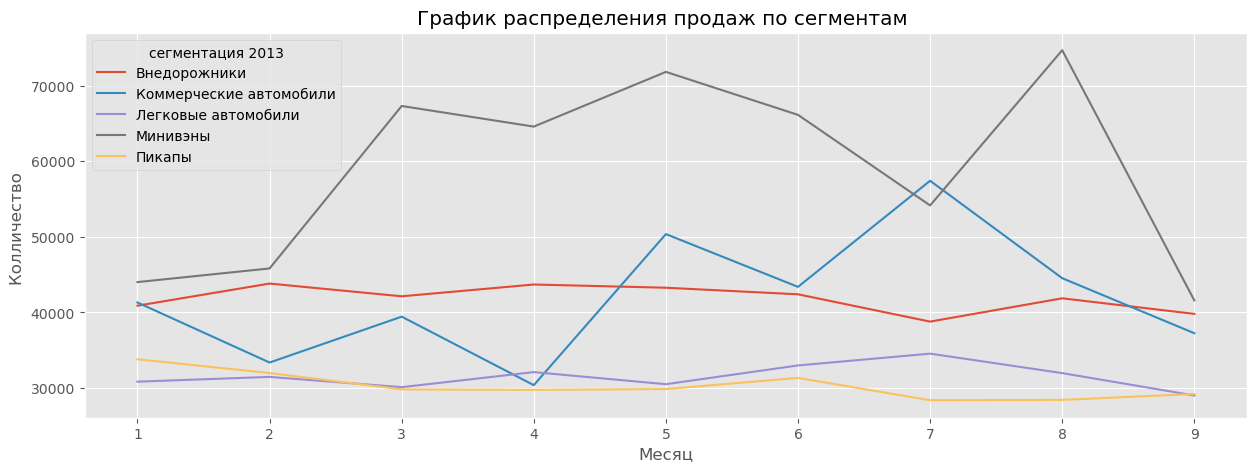

In [57]:
%matplotlib inline

df.pivot_table(
    index='месяц_1',  
    columns='сегментация 2013',  
    values='продажа, usd', 
    
).plot(figsize=(15, 5), grid=True).set_title('График распределения продаж по сегментам ')
plt.xlabel('Месяц')
plt.ylabel('Колличество ')
plt.show()

In [58]:
# Вычисляем общую выручку
total_revenue = df['количество'] * df['продажа, usd']

Общая выручка

In [59]:
print(total_revenue.sum())

4229072521


Средняя выручка

In [60]:
print(total_revenue.mean())

198930.92436144693


Ежемесячная выручка

In [61]:
t = df.groupby('месяц_1',dropna=False)['продажа, usd'].agg(['sum','count'])
t

,sum,count
месяц_1,,
1,68325141,1839
2,70806467,1865
3,82058522,2171
4,99851631,2626
5,105680223,2636
6,100639374,2545
7,103810808,2620
8,96331211,2484
9,87205262,2473


In [62]:
e = df.groupby(['наименование дилерского центра'],dropna=False)['продажа, usd'].agg(['sum','count'])
e

,sum,count
наименование дилерского центра,,
ABS-INVEST,320230,26
ALAN MOTORS,207265,21
ALAN MOTORS Усть-Каменогорск,186790,19
AST-commerce,12684,1
ASTER AUTO CЕМЕЙ,70294,2
...,...,...
Тойота Центр Шымкент,10625317,260
Урал-Кров Авто,3406506,240
Уральский АЦ КАМАЗ,889923,16


In [63]:
segment_2013 = df.groupby(['сегментация 2013'],dropna=False)['продажа, usd'].agg(['sum','count'])
segment_2013

,sum,count
сегментация 2013,,
Внедорожники,430206962,10292
Коммерческие автомобили,110802020,2594
Легковые автомобили,239741785,7605
Минивэны,22213828,376
Пикапы,11744044,392


Продажи регион - бренд

In [64]:
df.groupby(['регион','бренд'],dropna=False)['продажа, usd'].agg(['sum','count'])

sum  count
регион    бренд                    
Актау     Chevrolet   210993     16
          Foton        99108      1
          GAZ        1237112     74
          Hyundai    4527886    203
          Jac          26942      2
...                      ...    ...
ЭКСПОРТ   Toyota     6491654    143
Экибастуз Kia         283400     12
          Lada       1343900     65
          Skoda       139088      6
          UAZ          62300      5

[354 rows x 2 columns]

Продажи автоцентров

In [65]:
df.groupby(['наименование дилерского центра','бренд'],dropna=False)['продажа, usd'].agg(['sum','count'])

sum  count
наименование дилерского центра бренд                
ABS-INVEST                     Lifan   320230     26
ALAN MOTORS                    Ravon   207265     21
ALAN MOTORS Усть-Каменогорск   Ravon   186790     19
AST-commerce                   Jac      12684      1
ASTER AUTO CЕМЕЙ               Subaru   70294      2
...                                       ...    ...
Фаворит Моторс                 Ravon    89563      9
                               Subaru  231229      7
ЭКСПОРТ                        Jac     146460     10
                               Ravon    85890     10
                               Toyota  113457      2

[415 rows x 2 columns]

Продажи бренд - модель

In [66]:
df.groupby(['бренд','модель'],dropna=False)['продажа, usd'].agg(['sum','count'])

sum  count
бренд модель                       
ANKAI HF-D105         228309      2
      HFF6124G03EV3   307986      1
      HFF6127GZ-4     142789      1
      HFF6850G       5228714     63
Audi  A3               60362      2
...                      ...    ...
Урал  32551           121417      1
      4320           2400669      7
      4320-1951-40     40788      1
      4320-1951-60    211492      1
      5557            241982      2

[275 rows x 2 columns]

                                                  Выводы 

- Лучшие месяцы выручки - Май, Апрель, Июль

- Среди компаний лидируют - Toyota Motor Kazakhstan, Astana Motors, БИПЭК АВТО

- Популярные бренды автомобилей - Hyundai, Toyota, Lada

- Модели - Tucson, Accent, Camry    

- Года выпуска - 2018 и 2019

- Производства - Казахстан, РФ 

- Вид топлива - Бензин

- Тип привода - 4WD и 2WD

- Сегмента - В и С 

- Лидирующие продажи в городах г.Алматы и г.Нур-Султан

- Больше всего продаж в диллерских центрах  - Hyundai Auto Almaty, Hyundai Premium Almaty, Автомир-Центр Караганда  

- В основном физические лица 

- Покупки в кредит или по безналичному расчету

- Покупка одной машины в ценовой категории 13800 доллар США

- В основном внедорожники 

- Импорт и Локальное производство почти равны



Общая выручка - 4 229 072 521 млн. долларов США

Средняя выручка - 198 931 тысяч долларов США





                                  Анализ коммерческого транспорта 

In [67]:
com = df[df['сегментация 2013'] == 'Коммерческие автомобили']
com

,год,месяц,компания,бренд,модель,модификация,год выпуска,страна-производитель,вид топлива,"объём двиг, л,",...,форма расчета,количество,"цена, usd","продажа, usd",область,сегментация 2013,класс 2013,сегментация eng,локализация производства,месяц_1
559,2019,Январь,Daewoo Bus Kazakhstan,Daewoo,BS 106 A,BS 106 А,2018,Республика Казахстан,Дизель,"2,5",...,0,2,97785,195571,Атырауская область,Коммерческие автомобили,Большие автобусы,O,Локальное производство,1
560,2019,Март,Daewoo Bus Kazakhstan,Daewoo,BS 106 A,BS 106 А,2019,Республика Казахстан,Дизель,"2,5",...,безналичные,5,100531,502659,Атырауская область,Коммерческие автомобили,Большие автобусы,O,Локальное производство,3
561,2019,Март,Daewoo Bus Kazakhstan,Daewoo,BS 106 A,BS 106 А,2019,Республика Казахстан,Дизель,"2,5",...,безналичные,1,102542,102542,Атырауская область,Коммерческие автомобили,Большие автобусы,O,Локальное производство,3
562,2019,Март,Daewoo Bus Kazakhstan,Daewoo,BS 106 A,BS 106 А,2019,Республика Казахстан,Дизель,"2,5",...,безналичные,1,102542,102542,Актюбинская область,Коммерческие автомобили,Большие автобусы,O,Локальное производство,3
563,2019,Сентябрь,Daewoo Bus Kazakhstan,Daewoo,BS 106 A,BS 106 А,2019,Республика Казахстан,Дизель,"2,5",...,безналичные,1,97134,97135,Туркестанская область,Коммерческие автомобили,Большие автобусы,O,Локальное производство,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21223,2019,Июль,Allur Auto,ANKAI,HFF6127GZ-4,Bus,2019,Республика Казахстан,Дизель,"8,4 L,",...,безналичные,1,142788,142789,Костанайская область,Коммерческие автомобили,Большие автобусы,O,Локальное производство,7
21224,2019,Июль,Автокапитал,Mercedes-Benz Trucks,Setra,Setra S 511 HD,2019,Германия,Дизель,0,...,0,1,328510,328511,г.Алматы,Коммерческие автомобили,Большие автобусы,O,Импорт,7
21225,2019,Июль,Allur Auto,Yutong,ZK6108HGH,Bus,2019,Республика Казахстан,Дизель,"6,7L",...,безналичные,1,91979,91979,Костанайская область,Коммерческие автомобили,Средние автобусы,O,Локальное производство,7
21226,2019,Сентябрь,Allur Auto,Yutong,ZK6108HGH,"Diesel 10,3 m",2019,Республика Казахстан,Дизель,"6,5",...,безналичные,1,98175,98175,Костанайская область,Коммерческие автомобили,Средние автобусы,O,Локальное производство,9


In [68]:
com.columns

Index(['год', 'месяц', 'компания', 'бренд', 'модель', 'модификация',
       'год выпуска', 'страна-производитель', 'вид топлива', 'объём двиг, л,',
       'коробка передач', 'тип привода', 'сегмент', 'регион',
       'наименование дилерского центра', 'тип клиента', 'форма расчета',
       'количество', 'цена, usd', 'продажа, usd', 'область',
       'сегментация 2013', 'класс 2013', 'сегментация eng',
       'локализация производства', 'месяц_1'],
      dtype='object')

In [69]:
com['месяц'].value_counts(dropna=False)

Май         426
Июль        314
Апрель      310
Март        309
Август      293
Июнь        265
Сентябрь    248
Февраль     226
Январь      203
Name: месяц, dtype: int64

In [70]:
com['компания'].value_counts(dropna=False)

Вираж                            1576
ТК КАМАЗ                          328
БИПЭК АВТО                        246
Allur Auto                        130
СемАЗ                              91
Hyundai Com Trans Kazakhstan       89
Хино Моторс Казахстан              36
Автокапитал                        29
СВС-ТРАНС                          26
Scania Central Asia                12
Volkswagen Group Rus               11
Daewoo Bus Kazakhstan              10
MAN Truck & Bus Kazakhstan          6
Mercur Auto                         2
Hino Motors                         2
Name: компания, dtype: int64

In [71]:
com['бренд'].value_counts(dropna=False)

GAZ                     1361
UAZ                      461
KAMAZ                    327
Hyundai Truck & Bus       89
ANKAI                     67
Jac                       45
Shacman                   41
Hino                      38
Foton                     28
Mercedes-Benz Trucks      24
Isuzu                     22
Iveco                     15
Volkswagen                13
Урал                      12
Scania                    12
MAN                       11
Dong Feng                 10
Daewoo                    10
Mercedes-Benz              5
Yutong                     2
Nefaz                      1
Name: бренд, dtype: int64

In [72]:
com['модель'].value_counts(dropna=False)

3302       759
Next       322
3909       197
2705       113
2206       101
          ... 
HD 79        1
HD 170       1
NMS85        1
Daily A      1
58815Z       1
Name: модель, Length: 98, dtype: int64

In [73]:
com['модификация'].value_counts(dropna=False)

0                                   260
GAZ ГАЗ-330252-750 грузовой 1,5т     54
GAZ ГАЗ-33025-750 грузовой 1,5т      50
KAMAZ 65115                          46
GAZ ГАЗ-3302-750 грузовой 1,5т       43
                                   ... 
KAMAZ АТЗ 66052                       1
KAMAZ 66052                           1
TGS 26.360 6x4 BL                     1
TGS 26.360 6x4 BB                     1
KAMAZ 58815Z                          1
Name: модификация, Length: 512, dtype: int64

In [74]:
com['год выпуска'].value_counts(dropna=False)

2019    1464
2018     936
2017     123
0         45
2016      22
2014       2
2013       1
2011       1
Name: год выпуска, dtype: int64

In [75]:
com['страна-производитель'].value_counts(dropna=False)

Российская Федерация    1523
Республика Казахстан     974
Япония                    38
Германия                  28
Нидерланды                12
Испания                    9
Польша                     4
Турция                     2
Китай                      2
Корея                      1
Узбекистан                 1
Name: страна-производитель, dtype: int64

In [76]:
com['вид топлива'].value_counts(dropna=False)

Бензин           1605
Дизель            588
0                 397
0                   3
Электричество       1
Name: вид топлива, dtype: int64

In [77]:
com['объём двиг, л,'].value_counts(dropna=False)

2,7        1358
0           692
2,693       246
4,3          62
4            34
2,8          33
2,5          22
5            19
2            17
3,9          16
3.8          15
13           12
2,2           9
12            7
2.7           7
10,5          6
5,2           6
3,8           5
3             4
1,6           4
7,6           4
4,98          2
12,3          2
4,3,          1
6,7L          1
8,4 L,        1
88 KWH        1
4,98 L,       1
7,5           1
4,9           1
8,7           1
3,0 L         1
11            1
12,8          1
6,5           1
Name: объём двиг, л,, dtype: int64

In [78]:
com['коробка передач'].value_counts(dropna=False)

Мех.    1366
MT       643
0        265
5МТ      141
5MT      115
МКПП      15
DSG       11
МТ        11
5АТ        6
7АТ        6
АКП        5
6АТ        3
7AT        3
12AT       1
AT         1
5AT        1
12АТ       1
Name: коробка передач, dtype: int64

In [79]:
com['тип привода'].value_counts(dropna=False)

Задний    1095
0          581
Полный     517
RWD        174
2WD        139
AWD         57
4x2         18
4WD          9
Астана       2
4x4          2
Name: тип привода, dtype: int64

In [80]:
com['сегмент'].value_counts(dropna=False)

0                                                    1758
Грузовой автомобиль                                   327
Развозные автомобили                                  164
Микроавтобусы                                          58
Коммерческие автомобили                                50
Малотоннажные грузовики                                22
LCV                                                    16
Развозные автомобили                                   16
Микроавтобусы                                          15
среднетоннажные                                        14
магистральные перевозки                                12
коммерческий транспорт                                 11
Малотоннажные грузовики                                11
салон                                                  10
автобус                                                 9
малотоннажные                                           9
Шасси                                                   7
Промтоварный ф

In [81]:
com['регион'].value_counts(dropna=False)

Алматы              599
Нур-Султан          350
Актобе              182
Атырау              168
Актау               152
Уральск             152
Караганда           150
Усть-Каменогорск    146
Костанай            138
Шымкент             120
Павлодар             94
Петропавловск        85
Кокшетау             84
Кызылорда            75
Семей                39
ЭКСПОРТ              24
Тараз                22
Талдыкорган           9
Экибастуз             2
Туркестан             1
Кульсары              1
Зыряновск             1
Name: регион, dtype: int64

In [82]:
com['наименование дилерского центра'].value_counts(dropna=False)

Вираж Алматы           257
Вираж Астана           162
Вираж Караганда        131
Вираж Атырау           129
Вираж Уральск          121
                      ... 
Автотрейд К              1
Костанай КазБелАз        1
Автоцентр Бахус          1
Меридиан АВТО Актау      1
Mercur Auto Атырау       1
Name: наименование дилерского центра, Length: 79, dtype: int64

In [83]:
com['тип клиента'].value_counts(dropna=False)

Ю    1291
Ф     706
0     597
Name: тип клиента, dtype: int64

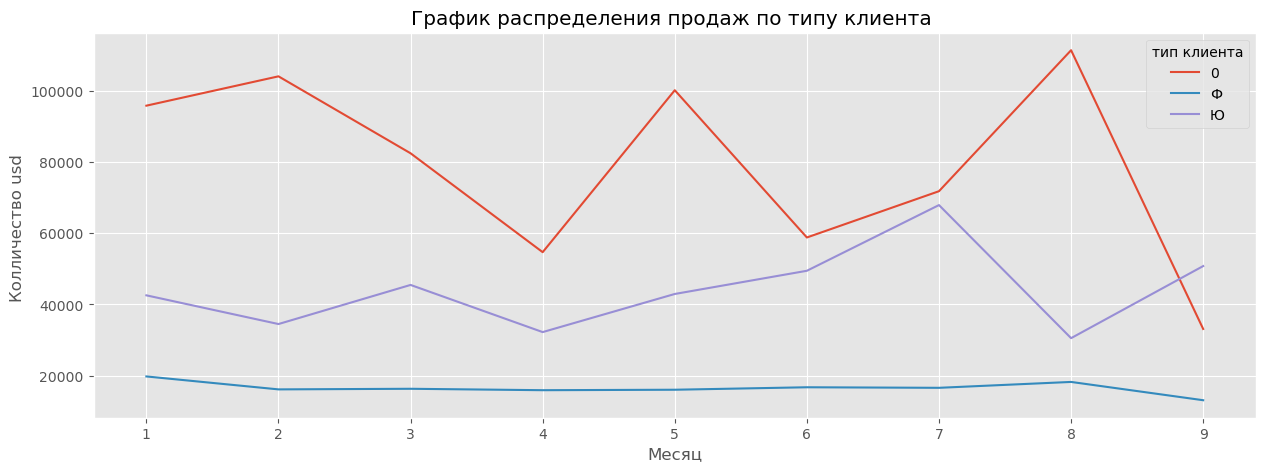

In [84]:
%matplotlib inline

com.pivot_table(
    index='месяц_1',  
    columns='тип клиента',  
    values='продажа, usd', 
    
).plot(figsize=(15, 5), grid=True).set_title('График распределения продаж по типу клиента ')
plt.xlabel('Месяц')
plt.ylabel('Колличество usd ')
plt.show()

In [85]:
com['форма расчета'].value_counts(dropna=False)

безналичные    1688
0               704
наличные        198
Без оплаты        3
кредит            1
Name: форма расчета, dtype: int64

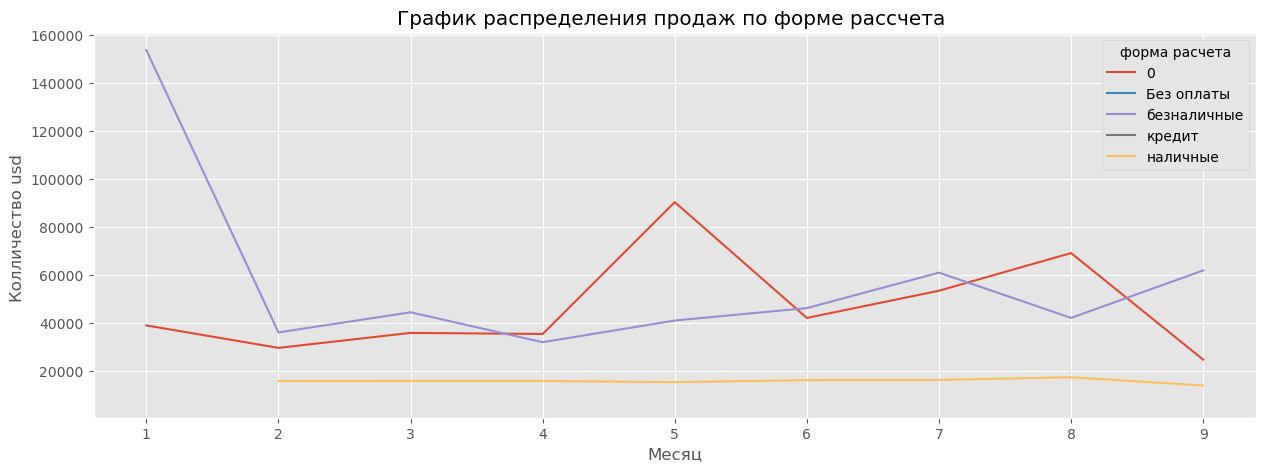

In [86]:
%matplotlib inline

com.pivot_table(
    index='месяц_1',  
    columns='форма расчета',  
    values='продажа, usd', 
    
).plot(figsize=(15, 5), grid=True).set_title('График распределения продаж по форме рассчета ')
plt.xlabel('Месяц')
plt.ylabel('Колличество usd ')
plt.show()

In [87]:
com['количество'].value_counts(dropna=False)

1     2371
2      100
3       43
5       20
4       17
6        9
10       6
30       4
22       3
9        2
14       2
19       2
7        2
16       2
17       1
29       1
8        1
21       1
23       1
18       1
15       1
0        1
20       1
12       1
50       1
Name: количество, dtype: int64

In [88]:
com['цена, usd'].value_counts(dropna=False)

11200    90
14200    69
14400    46
15878    41
16200    34
         ..
89998     1
90414     1
79660     1
70457     1
48756     1
Name: цена, usd, Length: 691, dtype: int64

In [89]:
com['продажа, usd'].value_counts(dropna=False)

11200     43
14200     40
15915     32
81708     32
15684     31
          ..
79661      1
70458      1
100757     1
91003      1
48757      1
Name: продажа, usd, Length: 737, dtype: int64

In [90]:
com['область'].value_counts(dropna=False)

г.Алматы                          599
г.Нур-Султан                      350
Восточно-Казахстанская область    186
Актюбинская область               182
Атырауская область                169
Западно-Казахстанская область     152
Мангистауская область             152
Карагандинская область            150
Костанайская область              138
Южно-Казахстанская область        120
Павлодарская область               96
Северо-Казахстанская область       85
Акмолинская область                84
Кызылординская область             75
Экспорт область                    24
Жамбылская область                 22
Алматинская область                 9
Туркестанская область               1
Name: область, dtype: int64

In [91]:
com['сегментация 2013'].value_counts(dropna=False)

Коммерческие автомобили    2594
Name: сегментация 2013, dtype: int64

In [92]:
com['класс 2013'].value_counts(dropna=False)

Малотоннажные грузовики      1376
Крупнотоннажные грузовики     450
Микроавтобусы                 332
Развозные автомобили          282
Большие автобусы               86
Среднетоннажные грузовики      53
Средние автобусы               15
Name: класс 2013, dtype: int64

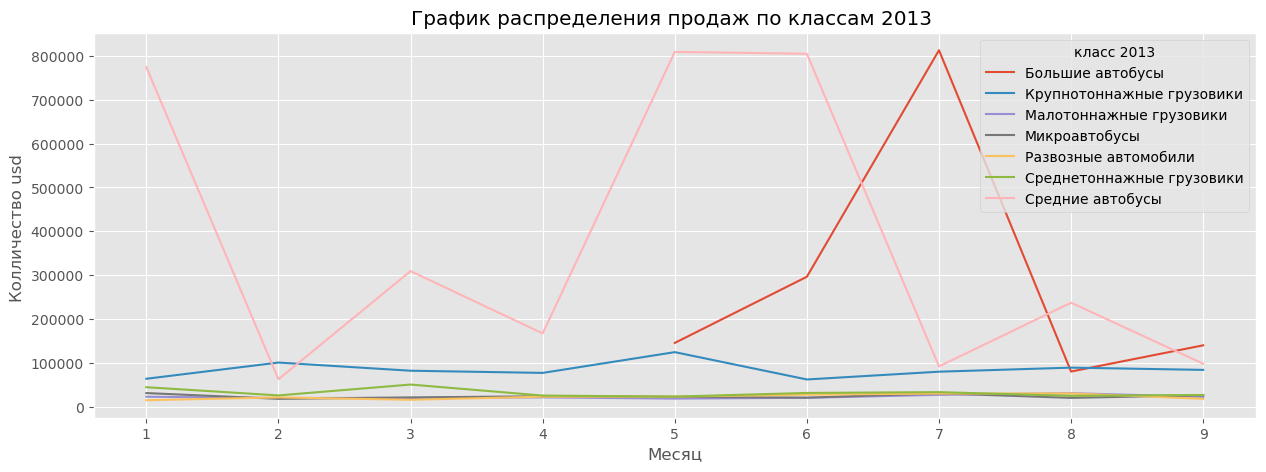

In [93]:
%matplotlib inline

com.pivot_table(
    index='месяц_1',  
    columns='класс 2013',  
    values='продажа, usd', 
    
).plot(figsize=(15, 5), grid=True).set_title('График распределения продаж по классам 2013 ')
plt.xlabel('Месяц')
plt.ylabel('Колличество usd ')
plt.show()

In [94]:
com['сегментация eng'].value_counts(dropna=False)

N     1376
O      591
L1     328
L2     299
Name: сегментация eng, dtype: int64

In [95]:
com['локализация производства'].value_counts(dropna=False)

Импорт                    1620
Локальное производство     974
Name: локализация производства, dtype: int64

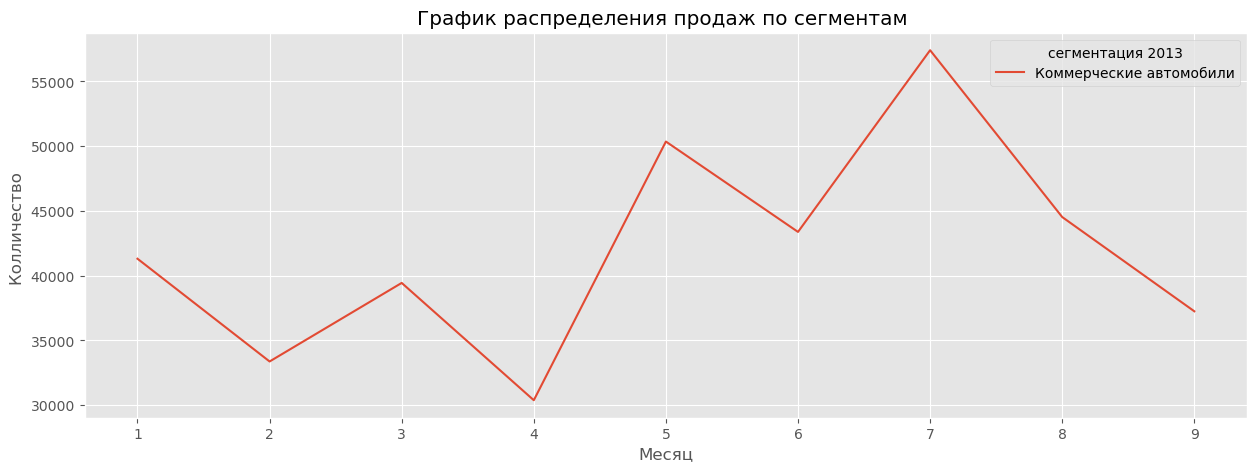

In [96]:
%matplotlib inline

com.pivot_table(
    index='месяц_1',  
    columns='сегментация 2013',  
    values='продажа, usd', 
    
).plot(figsize=(15, 5), grid=True).set_title('График распределения продаж по сегментам ')
plt.xlabel('Месяц')
plt.ylabel('Колличество ')
plt.show()

In [97]:
# Вычисляем общую выручку
total_revenue_1 = com['количество'] * com['продажа, usd']

Общая выручка 

In [98]:
print(total_revenue_1.sum())

810714285


Средняя выручка

In [99]:
print(total_revenue_1.mean())

312534.4198149576


                                                     Выводы 
                                                     
- Лучшие месяцы выручки - Май, Июль, Апрель

- Среди компаний лидируют - Вираж, ТК КАМАЗ, БИПЭК АВТО

- Популярные бренды автомобилей - GAZ, UAZ, KAMAZ

- Модель - 3302

- Года выпуска - 2019

- Производства - РФ и РК

- Вид топлива - Бензин

- Тип привода - Задний

- Сегмента - Грузовой автомобиль

- Лидирующие продажи в г.Алматы

- Больше всего продаж в диллерском центре - Вираж Алматы

- В основном юридические лица

- Покупки по безналичному расчету

- Покупка одной машины в ценовой категории 11200 и 14200 доллар США

- В основном Малотоннажные грузовики

- Импорт


Общая выручка - 810 714 285 т. долларов США

Средня выручка - 312 534 т. долларов США

                               Анализ некоммерческого транспорта 

In [100]:
necom = df[df['сегментация 2013'] != 'Коммерческие автомобили']
necom

,год,месяц,компания,бренд,модель,модификация,год выпуска,страна-производитель,вид топлива,"объём двиг, л,",...,форма расчета,количество,"цена, usd","продажа, usd",область,сегментация 2013,класс 2013,сегментация eng,локализация производства,месяц_1
0,2019,Май,Mercur Auto,Audi,A3,TFSI,2018,Германия,Бензин,"1,4",...,безналичные,1,28115,28115,г.Алматы,Легковые автомобили,C класс,C,Импорт,5
1,2019,Август,Mercur Auto,Audi,A3,TFSI,2018,Германия,Бензин,"1,4",...,наличные,1,32246,32247,г.Алматы,Легковые автомобили,C класс,C,Импорт,8
2,2019,Апрель,Mercur Auto,Audi,A4,TFSI,2018,Германия,Бензин,"1,4",...,безналичные,1,32000,32000,г.Алматы,Легковые автомобили,D класс,D,Импорт,4
3,2019,Июль,Mercur Auto,Audi,A4,TFSI,2018,Германия,Бензин,"1,4",...,безналичные,1,31929,31929,г.Алматы,Легковые автомобили,D класс,D,Импорт,7
4,2019,Июль,Mercur Auto,Audi,A4,TFSI,2018,Германия,Бензин,"1,4",...,наличные,1,31929,31929,г.Алматы,Легковые автомобили,D класс,D,Импорт,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21253,2019,Сентябрь,Renault Россия,Renault,Arkana,B32M1TX5C,2019,Российская Федерация,0,0,...,0,1,20889,20889,Атырауская область,Внедорожники,Компактные SUV,K1,Импорт,9
21254,2019,Сентябрь,Renault Россия,Renault,Arkana,B34M3TX5C,2019,Российская Федерация,0,0,...,0,1,21275,21276,Атырауская область,Внедорожники,Компактные SUV,K1,Импорт,9
21255,2019,Январь,Scandinavian Motors,Volvo,V90,V90CC Pro,2018,Швеция,Бензин,2.0,...,0,1,59199,59200,г.Алматы,Легковые автомобили,E класс,E,Импорт,1
21256,2019,Апрель,Scandinavian Motors,Volvo,V90,V90CC Pro,2019,Швеция,Бензин,2,...,безналичные,1,56646,56646,г.Алматы,Легковые автомобили,E класс,E,Импорт,4


In [101]:
necom.columns

Index(['год', 'месяц', 'компания', 'бренд', 'модель', 'модификация',
       'год выпуска', 'страна-производитель', 'вид топлива', 'объём двиг, л,',
       'коробка передач', 'тип привода', 'сегмент', 'регион',
       'наименование дилерского центра', 'тип клиента', 'форма расчета',
       'количество', 'цена, usd', 'продажа, usd', 'область',
       'сегментация 2013', 'класс 2013', 'сегментация eng',
       'локализация производства', 'месяц_1'],
      dtype='object')

In [102]:
necom['месяц'].value_counts(dropna=False)

Апрель      2316
Июль        2306
Июнь        2280
Сентябрь    2225
Май         2210
Август      2191
Март        1862
Февраль     1639
Январь      1636
Name: месяц, dtype: int64

In [103]:
necom['компания'].value_counts(dropna=False)

Toyota Motor Kazakhstan      4450
Astana Motors                3740
БИПЭК АВТО                   3353
Astana Motors                1271
Renault Россия               1193
Nissan Manufacturing RUS     1110
Allur Auto                    516
Вираж                         441
Равон Моторс Казахстан        387
ММС Рус                       386
Mercur Auto                   384
Subaru Kazakhstan             333
Автоцентр-Бавария             224
Лифан Моторс Рус              137
Автомир ГК                    110
Almaty Motors Premium          90
Автокапитал                    89
Volkswagen Group Rus           89
УзАвто-Казахстан               74
Eurasia Motor Premium          71
TERRA MOTORS                   63
Автодом Motors KST             49
Scandinavian Motors            40
Автомир-Центр                  34
ТОО "Eurasia Motor Zhaik"      15
СВС-ТРАНС                      13
Каспиан Моторс                  3
Name: компания, dtype: int64

In [104]:
necom['бренд'].value_counts(dropna=False)

Hyundai          5010
Toyota           3779
Lada             1962
Renault          1193
Nissan           1042
Kia               823
Lexus             671
Jac               477
Ravon             471
Volkswagen        471
Mitsubishi        386
Skoda             370
Chevrolet         341
Subaru            334
UAZ               322
BMW               209
Lifan             137
Land Rover        118
Mazda             110
Mercedes-Benz      89
Infiniti           68
Porsche            52
Audi               48
Cadillac           47
Volvo              40
Jaguar             35
Peugeot            29
Mini               15
Isuzu              13
Ford                3
Name: бренд, dtype: int64

In [105]:
necom['модель'].value_counts(dropna=False)

Tucson       1375
Accent       1254
Camry        1173
Creta        1054
LC Prado      760
             ... 
i8              1
XE              1
CLA-Class       1
iev             1
Cabrio          1
Name: модель, Length: 173, dtype: int64

In [106]:
necom['модификация'].value_counts(dropna=False)

0                                 3004
Hyundai Tucson ix35 FL Comfort     296
54                                 289
Hyundai Tucson ix35 FL Travel      281
легковой                           279
                                  ... 
23632-355-03 Кун легковой            1
SE+ Perso red                        1
236321-470+БДИФ легковой             1
23632-155-13 Кунг легковой           1
TFGB1113D6                           1
Name: модификация, Length: 875, dtype: int64

In [107]:
necom['год выпуска'].value_counts(dropna=False)

2019     13457
2018      4481
2 019      241
2 018      226
0          186
2017        67
2016         7
Name: год выпуска, dtype: int64

In [108]:
necom['страна-производитель'].value_counts(dropna=False)

Республика Казахстан    9477
Российская Федерация    5049
Япония                  2516
Турция                   447
Таиланд                  392
США                      257
Германия                 224
UK                       179
Австрия                   33
Узбекистан                29
Китай                     20
Швеция                    16
Корея                     15
Бельгия                    6
Венгрия                    2
Польша                     2
Белоруссия                 1
Name: страна-производитель, dtype: int64

In [109]:
necom['вид топлива'].value_counts(dropna=False)

Бензин           17070
0                 1490
Дизель              65
2                   16
1,6                 11
гибрид              10
Электричество        3
Name: вид топлива, dtype: int64

In [110]:
necom['объём двиг, л,'].value_counts(dropna=False)

2          3083
1,6        2548
0          1598
1,596      1117
1,6 MPI    1082
           ... 
19,7          1
3,7           1
18,7          1
17,7          1
1.5           1
Name: объём двиг, л,, Length: 92, dtype: int64

In [111]:
necom['коробка передач'].value_counts(dropna=False)

6AT              4981
AT               4417
0                1613
CVT              1183
5MT               865
                 ... 
7DCT                2
Powershift S6       1
8 AT                1
8-ступ АКПП         1
7 АКПП PDK          1
Name: коробка передач, Length: 76, dtype: int64

In [112]:
necom['тип привода'].value_counts(dropna=False)

4WD        6315
2WD        4167
Ю          2998
0          1638
Полный     1216
FF         1036
AWD         581
FWD         543
0            68
quattro      43
4Motion      25
Задний       19
4x4           5
4х4           4
RWD           4
#Н/Д          3
Name: тип привода, dtype: int64

In [113]:
necom['сегмент'].value_counts(dropna=False)

0           2822
B класс     1728
C-SUV       1515
C           1420
B           1254
            ... 
A класс        1
sedan          1
5doors         1
5 door         1
5 doors        1
Name: сегмент, Length: 75, dtype: int64

In [114]:
necom['регион'].value_counts(dropna=False)

Алматы              4310
Нур-Султан          3427
Шымкент             1327
Караганда           1298
Костанай            1262
Атырау              1103
Уральск              904
Усть-Каменогорск     782
Актобе               782
Павлодар             776
Актау                694
Петропавловск        354
Кызылорда            342
ЭКСПОРТ              307
Кокшетау             282
Талдыкорган          204
Семей                197
Тараз                150
Экибастуз             86
Каскелен              38
Рудный                21
Туркестан             13
Сарыагаш               4
Риддер                 2
Name: регион, dtype: int64

In [115]:
necom['наименование дилерского центра'].value_counts(dropna=False)

Hyundai Premium Almaty     588
Автомир-Центр Караганда    555
Hyundai Premium Astana     536
Hyundai Auto Almaty        519
HYUNDAI AUTO ASTANA        456
                          ... 
СарыаркаАвтоПром             1
AST-commerce                 1
Равон Моторс Костанай        1
Ford Атырау                  1
Лекс-Авто                    1
Name: наименование дилерского центра, Length: 174, dtype: int64

In [116]:
necom['тип клиента'].value_counts(dropna=False)

Ф               10835
0                5662
Ю                2096
Корп. клиент       72
Name: тип клиента, dtype: int64

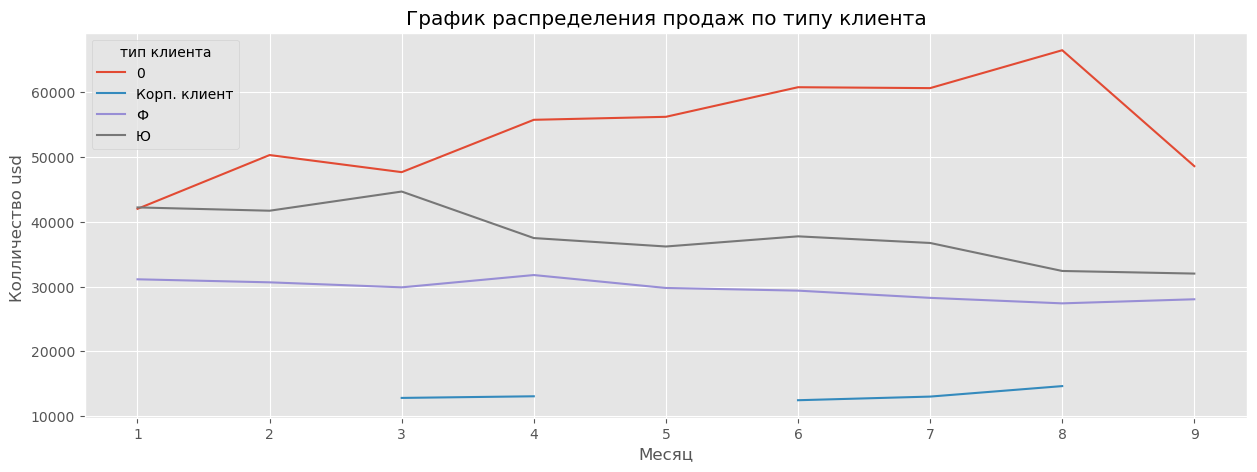

In [117]:
%matplotlib inline

necom.pivot_table(
    index='месяц_1',  
    columns='тип клиента',  
    values='продажа, usd', 
    
).plot(figsize=(15, 5), grid=True).set_title('График распределения продаж по типу клиента')
plt.xlabel('Месяц')
plt.ylabel('Колличество usd ')
plt.show()

In [118]:
necom['форма расчета'].value_counts(dropna=False)

0                   13529
кредит               2902
наличные             1072
безналичные          1043
trade-in              108
Без оплаты              4
безналичный             2
Отсрочка платежа        2
лизинг                  1
обмен+кредит            1
обмен+нал               1
Name: форма расчета, dtype: int64

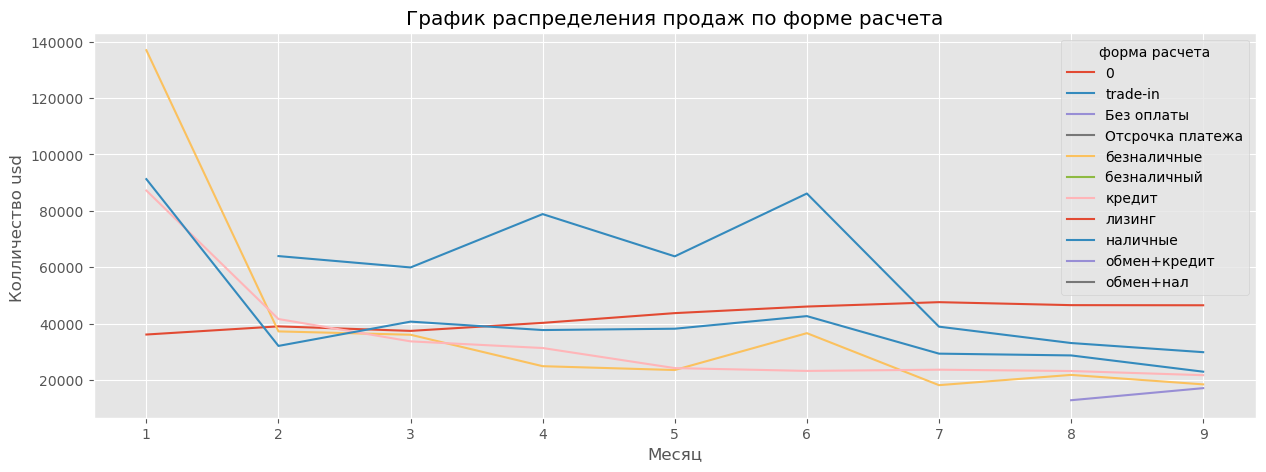

In [119]:
%matplotlib inline

necom.pivot_table(
    index='месяц_1',  
    columns='форма расчета',  
    values='продажа, usd', 
    
).plot(figsize=(15, 5), grid=True).set_title('График распределения продаж по форме расчета')
plt.xlabel('Месяц')
plt.ylabel('Колличество usd ')
plt.show()

In [120]:
necom['количество'].value_counts(dropna=False)

 1      16132
 2        913
 3        407
 4        264
 5        165
 6        111
 7         98
 8         78
 9         59
 10        57
 12        44
 13        36
 11        35
 14        31
 15        25
 18        23
 16        21
 17        17
 20        14
 24        12
 19        12
 23        11
 21        10
 26         9
 22         9
 25         9
 32         6
 30         5
 0          5
 29         5
 50         4
 27         4
 28         3
 33         3
 31         3
 36         3
 62         2
 46         1
 47         1
 79         1
-1          1
 100        1
 41         1
 38         1
 42         1
 51         1
 43         1
 40         1
 34         1
 54         1
 35         1
 115        1
 63         1
 60         1
 66         1
 37         1
 70         1
Name: количество, dtype: int64

In [121]:
necom['цена, usd'].value_counts(dropna=False)

11600    528
13800    426
7100     388
11300    229
9000     219
        ... 
30569      1
31112      1
30353      1
33843      1
60256      1
Name: цена, usd, Length: 2760, dtype: int64

In [122]:
necom['продажа, usd'].value_counts(dropna=False)

13800    228
9885     184
11600    174
27600    123
23200    106
        ... 
59406      1
29703      1
32247      1
31046      1
60256      1
Name: продажа, usd, Length: 3404, dtype: int64

In [123]:
necom['область'].value_counts(dropna=False)

г.Алматы                          4310
г.Нур-Султан                      3427
Южно-Казахстанская область        1327
Карагандинская область            1298
Костанайская область              1283
Атырауская область                1103
Восточно-Казахстанская область     981
Западно-Казахстанская область      904
Павлодарская область               862
Актюбинская область                782
Мангистауская область              694
Северо-Казахстанская область       354
Кызылординская область             342
Экспорт область                    307
Акмолинская область                282
Алматинская область                242
Жамбылская область                 150
Туркестанская область               17
Name: область, dtype: int64

In [124]:
necom['сегментация 2013'].value_counts(dropna=False)

Внедорожники           10292
Легковые автомобили     7605
Пикапы                   392
Минивэны                 376
Name: сегментация 2013, dtype: int64

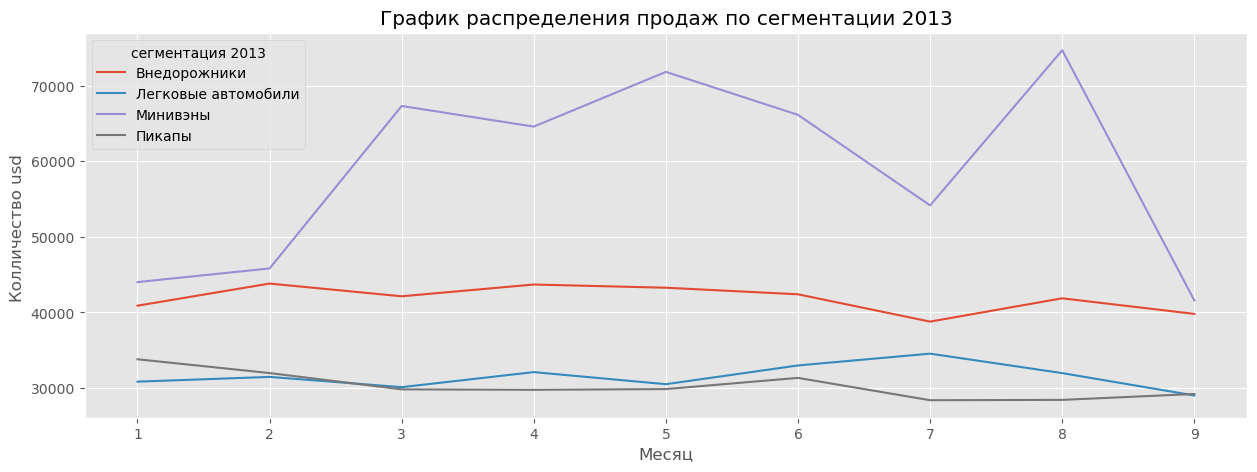

In [125]:
%matplotlib inline

necom.pivot_table(
    index='месяц_1',  
    columns='сегментация 2013',  
    values='продажа, usd', 
    
).plot(figsize=(15, 5), grid=True).set_title('График распределения продаж по сегментации 2013')
plt.xlabel('Месяц')
plt.ylabel('Колличество usd ')
plt.show()

In [126]:
necom['класс 2013'].value_counts(dropna=False)

B класс                   4244
Компактные SUV            3664
Субкомпактные SUV         2714
Среднеразмерные SUV       2430
D класс                   1588
C класс                   1499
Полноразмерные SUV        1484
Pick-ups                   392
Компактвэн                 334
E класс                    183
Полноразмерный Минивэн      42
A класс                     42
F класс                     39
Спортивные автомобили       10
Name: класс 2013, dtype: int64

In [127]:
necom['сегментация eng'].value_counts(dropna=False)

K1    6378
B     4244
K2    2430
D     1588
C     1499
K3    1484
K4     392
M      376
E      183
A       42
F       39
G2      10
Name: сегментация eng, dtype: int64

In [128]:
necom['локализация производства'].value_counts(dropna=False)

Локальное производство    9477
Импорт                    9188
Name: локализация производства, dtype: int64

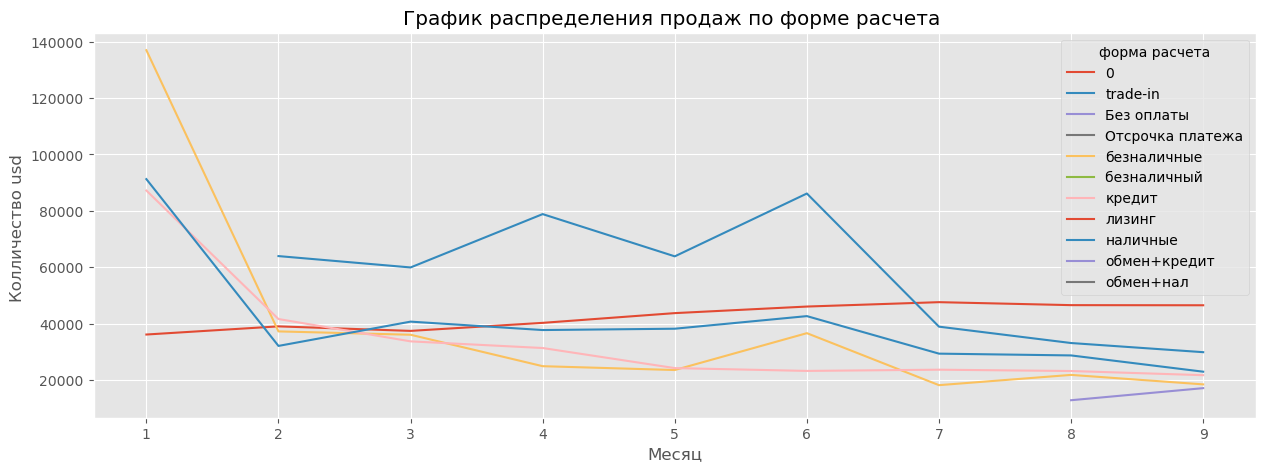

In [129]:
%matplotlib inline

necom.pivot_table(
    index='месяц_1',  
    columns='форма расчета',  
    values='продажа, usd', 
    
).plot(figsize=(15, 5), grid=True).set_title('График распределения продаж по форме расчета ')
plt.xlabel('Месяц')
plt.ylabel('Колличество usd ')
plt.show()

In [130]:
# Вычисляем общую выручку
total_revenue_2 = necom['количество'] * necom['продажа, usd']

Общая выручка

In [131]:
print(total_revenue_2.sum())

3418358236


Средняя выручка 

In [132]:
print(total_revenue_2.mean())

183142.68609697293


                                                          Выводы 
                                                     
- Лучшие месяцы выручки - Апрель, Июль, Июнь

- Среди компаний лидируют - Toyota Motor Kazakhstan, Astana Motors, БИПЭК АВТО  

- Популярные бренды автомобилей - Hyundai, Toyota

- Модель - Tucson, Accent, Camry

- Года выпуска - 2019

- Производства - РФ и РК

- Вид топлива - Бензин

- Тип привода - 4WD

- Сегмента - B

- Лидирующие продажи в Алматы , Нур-Султан

- Больше всего продаж в диллерском центре - Hyundai Premium Almaty , Автомир-Центр Караганда, Hyundai Premium Astana

- В основном физические  лица

- Покупки в кредит и наличными 

- Покупка одной машины в ценовой категории 13800 доллар США

- В основном внедорожники

- Импорт и локальное производство на равне


Общая выручка - 3 418 358 236 миллиарда долларов США 

Средняя выручка - 183 142 т. долларов США

                                        Анализ Меркур авто

In [133]:
mercur = df[df['компания'] == 'Mercur Auto']
mercur

,год,месяц,компания,бренд,модель,модификация,год выпуска,страна-производитель,вид топлива,"объём двиг, л,",...,форма расчета,количество,"цена, usd","продажа, usd",область,сегментация 2013,класс 2013,сегментация eng,локализация производства,месяц_1
0,2019,Май,Mercur Auto,Audi,A3,TFSI,2018,Германия,Бензин,"1,4",...,безналичные,1,28115,28115,г.Алматы,Легковые автомобили,C класс,C,Импорт,5
1,2019,Август,Mercur Auto,Audi,A3,TFSI,2018,Германия,Бензин,"1,4",...,наличные,1,32246,32247,г.Алматы,Легковые автомобили,C класс,C,Импорт,8
2,2019,Апрель,Mercur Auto,Audi,A4,TFSI,2018,Германия,Бензин,"1,4",...,безналичные,1,32000,32000,г.Алматы,Легковые автомобили,D класс,D,Импорт,4
3,2019,Июль,Mercur Auto,Audi,A4,TFSI,2018,Германия,Бензин,"1,4",...,безналичные,1,31929,31929,г.Алматы,Легковые автомобили,D класс,D,Импорт,7
4,2019,Июль,Mercur Auto,Audi,A4,TFSI,2018,Германия,Бензин,"1,4",...,наличные,1,31929,31929,г.Алматы,Легковые автомобили,D класс,D,Импорт,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21112,2019,Март,Mercur Auto,Volkswagen,Teramont,Teramont Status TSI 162 кВт (220 л.с.,2019,Российская Федерация,Бензин,2,...,безналичные,1,55556,55556,Костанайская область,Внедорожники,Полноразмерные SUV,K3,Импорт,3
21114,2019,Апрель,Mercur Auto,Volkswagen,Teramont,Status TSI 162 кВт (220 л.с.) 8-АКП 4MOTION,2018,Российская Федерация,Бензин,2,...,безналичные,1,52193,52194,г.Алматы,Внедорожники,Полноразмерные SUV,K3,Импорт,4
21115,2019,Апрель,Mercur Auto,Volkswagen,Teramont,Teramont Status FSI 206 кВт (280 л.с.) 8-АКП 4...,2018,Российская Федерация,Бензин,"3,6",...,наличные,1,56462,56462,г.Алматы,Внедорожники,Полноразмерные SUV,K3,Импорт,4
21117,2019,Май,Mercur Auto,Volkswagen,Teramont,Status,2018,США,Бензин,2,...,наличные,1,52103,52103,Атырауская область,Внедорожники,Полноразмерные SUV,K3,Импорт,5


In [134]:
mercur.columns

Index(['год', 'месяц', 'компания', 'бренд', 'модель', 'модификация',
       'год выпуска', 'страна-производитель', 'вид топлива', 'объём двиг, л,',
       'коробка передач', 'тип привода', 'сегмент', 'регион',
       'наименование дилерского центра', 'тип клиента', 'форма расчета',
       'количество', 'цена, usd', 'продажа, usd', 'область',
       'сегментация 2013', 'класс 2013', 'сегментация eng',
       'локализация производства', 'месяц_1'],
      dtype='object')

In [135]:
mercur.dtypes

год                                int64
месяц                             object
компания                          object
бренд                             object
модель                            object
модификация                       object
год выпуска                       object
страна-производитель              object
вид топлива                       object
объём двиг, л,                    object
коробка передач                   object
тип привода                       object
сегмент                           object
регион                            object
наименование дилерского центра    object
тип клиента                       object
форма расчета                     object
количество                         int32
цена, usd                          int32
продажа, usd                       int32
область                           object
сегментация 2013                  object
класс 2013                        object
сегментация eng                   object
локализация прои

In [136]:
mercur['месяц'].value_counts(dropna=False)

Февраль     92
Апрель      68
Май         66
Март        62
Январь      51
Июль        16
Август      13
Сентябрь    10
Июнь         8
Name: месяц, dtype: int64

In [137]:
mercur['компания'].value_counts(dropna=False)

Mercur Auto    386
Name: компания, dtype: int64

In [138]:
mercur['бренд'].value_counts(dropna=False)

Volkswagen    286
Porsche        52
Audi           48
Name: бренд, dtype: int64

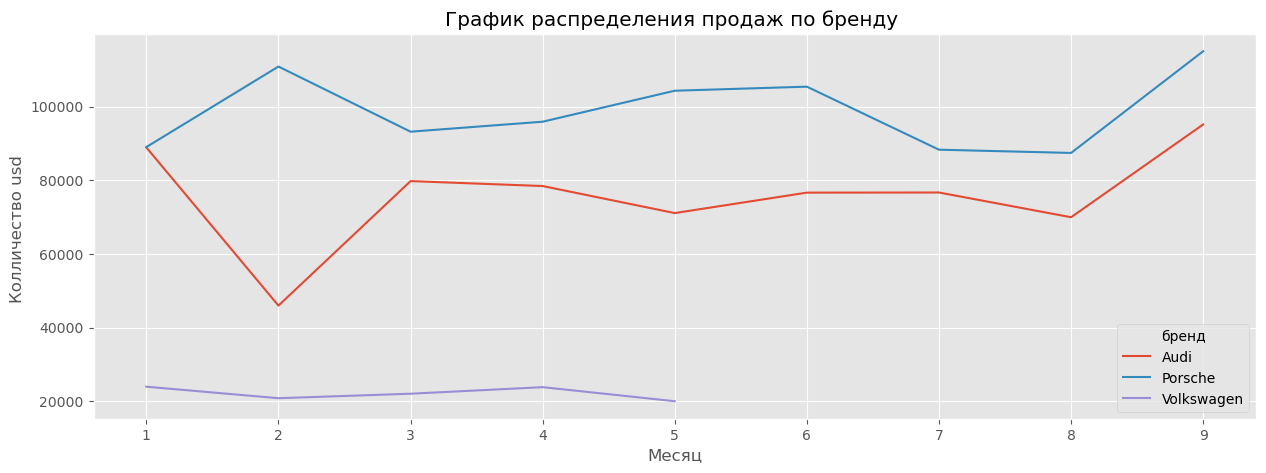

In [139]:
%matplotlib inline

mercur.pivot_table(
    index='месяц_1',  
    columns='бренд',  
    values='продажа, usd', 
    
).plot(figsize=(15, 5), grid=True).set_title('График распределения продаж по бренду ')
plt.xlabel('Месяц')
plt.ylabel('Колличество usd ')
plt.show()

In [140]:
mercur['модель'].value_counts(dropna=False)

Polo                  201
Tiguan                 67
Cayenne                28
Q8                     17
Macan                  15
Q5                      8
Panamera                8
A6                      7
A8                      5
Teramont                4
Touareg                 3
Q7                      3
A4                      3
Jetta                   3
Multivan                3
Transporter             2
A3                      2
A7                      2
RS5                     1
Amarok                  1
Transporter Kasten      1
911 Carrera S           1
Transporter Kombi       1
Name: модель, dtype: int64

In [141]:
mercur['модификация'].value_counts(dropna=False)

TFSI                                                   41
Polo sedan Comfortline MPI 81 кВт (110 л.с.), 6-АКП    32
Polo Trendline MPI 81 кВт (110 л.с.), 5-МКП            22
Polo Trendline MPI 81 кВт (110 л.с.), 6-АКП            20
Cayenne                                                19
                                                       ..
DRIVE A/T WMP                                           1
Panamera 4S                                             1
Panamera Turbo ST                                       1
S                                                       1
Kombi                                                   1
Name: модификация, Length: 85, dtype: int64

In [142]:
mercur['год выпуска'].value_counts(dropna=False)

2018    256
2019    113
2017     17
Name: год выпуска, dtype: int64

In [143]:
mercur['страна-производитель'].value_counts(dropna=False)

Российская Федерация    277
Германия                108
США                       1
Name: страна-производитель, dtype: int64

In [144]:
mercur['вид топлива'].value_counts(dropna=False)

Бензин    385
Дизель      1
Name: вид топлива, dtype: int64

In [145]:
mercur['объём двиг, л,'].value_counts(dropna=False)

1,6    202
2       81
3       72
1,4     23
4        3
8,7      1
0        1
2,0      1
2,9      1
3,6      1
Name: объём двиг, л,, dtype: int64

In [146]:
mercur['коробка передач'].value_counts(dropna=False)

АКП                   96
AT                    35
Tiptronic             28
6А                    24
6A                    23
МКП                   22
АКПП                  17
PDK                   12
5M                    11
7DSG                  11
8 АКПП Tiptronic S    11
S-Tronic              10
S-tronic              10
7 АКПП (PDK)           8
DSG                    7
8AT                    6
MT                     5
8АКПП                  5
МКПП                   5
5М                     5
A/T                    5
7АКП                   5
8                      5
М/T                    4
 7 АКП                 3
8 АКПП (PDK)           3
АТ                     2
А/T                    2
8A                     2
0                      1
8-ступ АКПП            1
7 АКПП PDK             1
6DSG                   1
Name: коробка передач, dtype: int64

In [147]:
mercur['тип привода'].value_counts(dropna=False)

0          151
Ю           68
4WD         59
quattro     43
4Motion     25
2WD         18
FWD         13
Полный       5
AWD          4
Name: тип привода, dtype: int64

In [148]:
mercur['сегмент'].value_counts(dropna=False)

легковой                       151
Легковые автомобили             74
Премиум SUV                     28
Внедорожники Premium            28
Внедорожники                    25
Легковые автомобили Premium     20
Легковые автомобили             16
premium SUV                     14
седан                            7
LCV                              7
Внедорожники                     5
Легковой автомобиль              5
SUV                              2
Premium                          1
Премиум SUV                      1
Sportcar                         1
Pick-Up                          1
Name: сегмент, dtype: int64

In [149]:
mercur['регион'].value_counts(dropna=False)

Алматы        245
Нур-Султан     51
Атырау         42
Караганда      21
Уральск        14
Костанай       13
Name: регион, dtype: int64

In [150]:
mercur['наименование дилерского центра'].value_counts(dropna=False)

Mercur Auto Алматы         194
Porsche Centre Almaty       52
Mercur Auto Астана          50
Mercur Auto Атырау          42
Автомир-Центр Караганда     21
Eurasia Motors Uralsk       14
Автодом Костанай            13
Name: наименование дилерского центра, dtype: int64

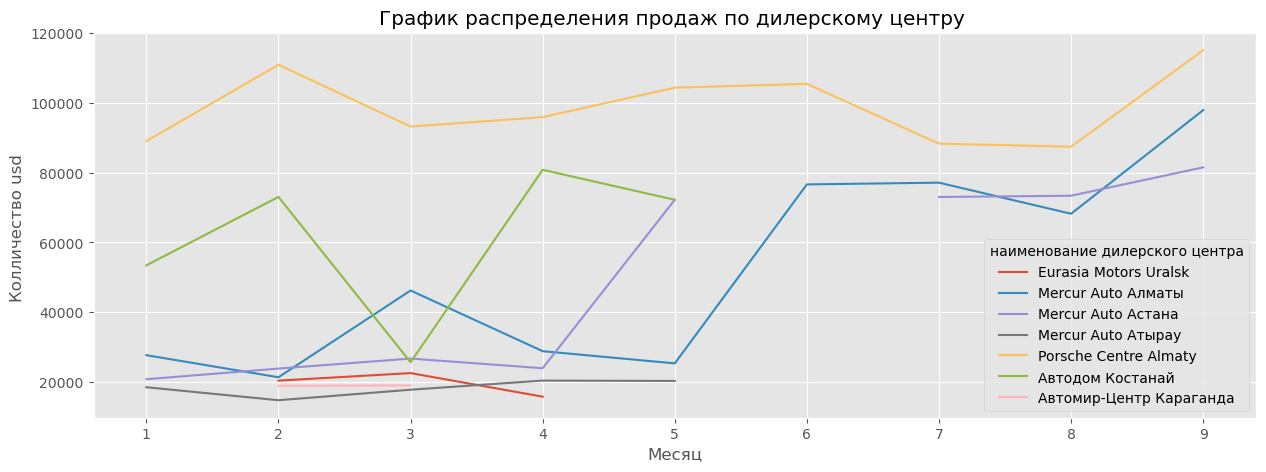

In [151]:
%matplotlib inline

mercur.pivot_table(
    index='месяц_1',  
    columns='наименование дилерского центра',  
    values='продажа, usd', 
    
).plot(figsize=(15, 5), grid=True).set_title('График распределения продаж по дилерскому центру ')
plt.xlabel('Месяц')
plt.ylabel('Колличество usd ')
plt.show()

In [152]:
mercur['тип клиента'].value_counts(dropna=False)

Ф    334
Ю     52
Name: тип клиента, dtype: int64

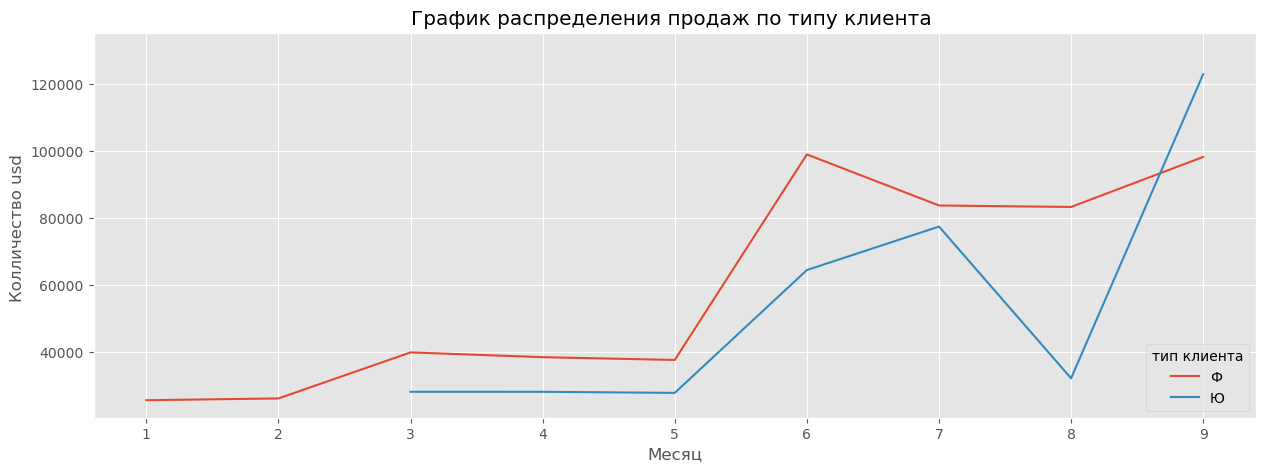

In [153]:
%matplotlib inline

mercur.pivot_table(
    index='месяц_1',  
    columns='тип клиента',  
    values='продажа, usd', 
    
).plot(figsize=(15, 5), grid=True).set_title('График распределения продаж по типу клиента ')
plt.xlabel('Месяц')
plt.ylabel('Колличество usd ')
plt.show()

In [154]:
mercur['форма расчета'].value_counts(dropna=False)

наличные        178
безналичные     156
0                48
кредит            2
безналичный       2
Name: форма расчета, dtype: int64

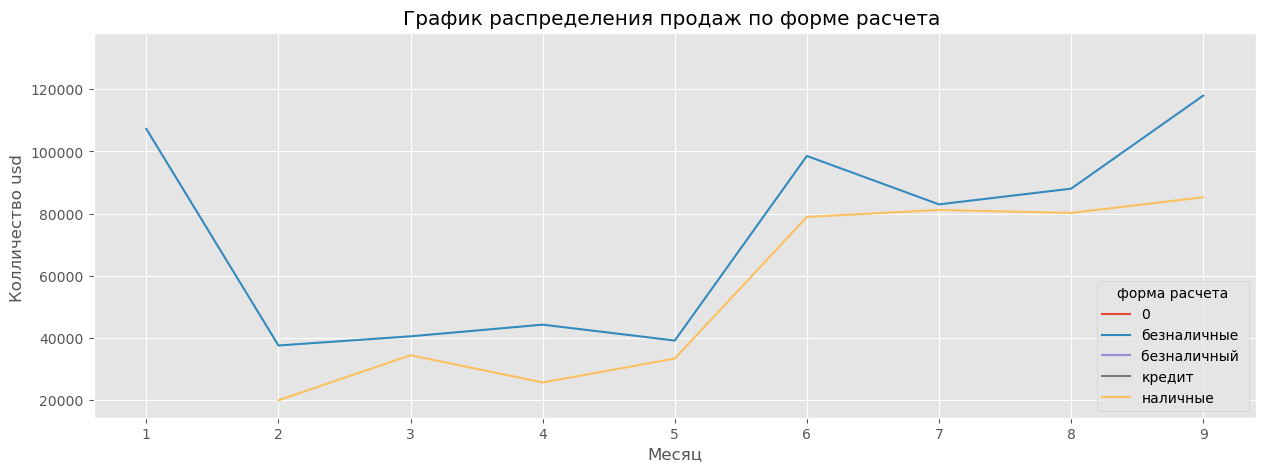

In [155]:
%matplotlib inline

mercur.pivot_table(
    index='месяц_1',  
    columns='форма расчета',  
    values='продажа, usd', 
    
).plot(figsize=(15, 5), grid=True).set_title('График распределения продаж по форме расчета ')
plt.xlabel('Месяц')
plt.ylabel('Колличество usd ')
plt.show()

In [156]:
mercur['количество'].value_counts(dropna=False)

1    384
2      1
7      1
Name: количество, dtype: int64

In [157]:
mercur['цена, usd'].value_counts(dropna=False)

15873    5
14894    4
15137    3
15360    3
78940    3
        ..
15322    1
13132    1
15271    1
13368    1
52103    1
Name: цена, usd, Length: 336, dtype: int64

In [158]:
mercur['продажа, usd'].value_counts(dropna=False)

15873    5
14894    3
78940    3
15058    3
15360    3
        ..
13132    1
15272    1
13369    1
15117    1
52103    1
Name: продажа, usd, Length: 340, dtype: int64

In [159]:
mercur['область'].value_counts(dropna=False)

г.Алматы                         245
г.Нур-Султан                      51
Атырауская область                42
Карагандинская область            21
Западно-Казахстанская область     14
Костанайская область              13
Name: область, dtype: int64

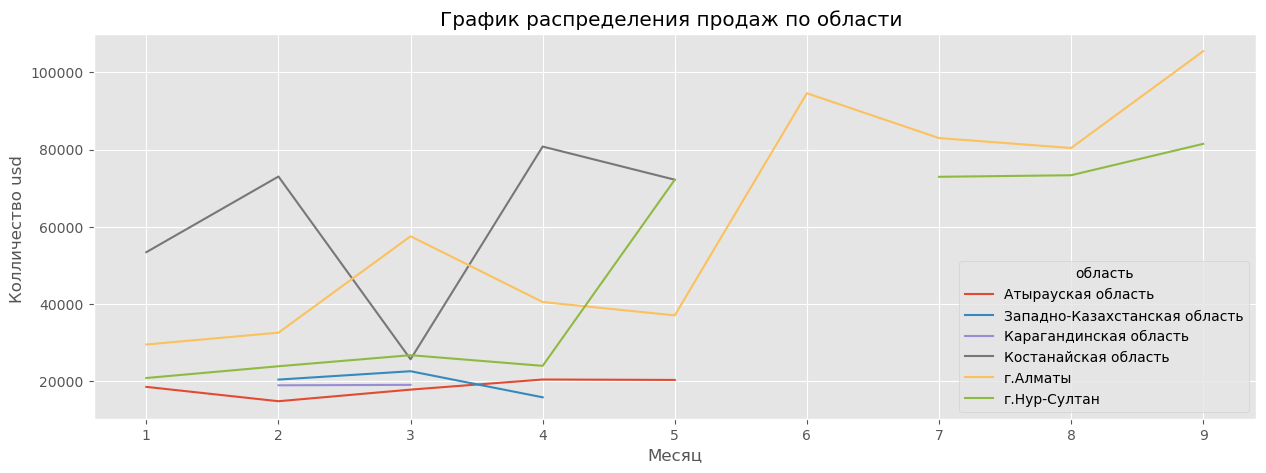

In [160]:
%matplotlib inline

mercur.pivot_table(
    index='месяц_1',  
    columns='область',  
    values='продажа, usd', 
    
).plot(figsize=(15, 5), grid=True).set_title('График распределения продаж по области ')
plt.xlabel('Месяц')
plt.ylabel('Колличество usd ')
plt.show()

In [161]:
mercur['сегментация 2013'].value_counts(dropna=False)

Легковые автомобили        233
Внедорожники               145
Минивэны                     5
Коммерческие автомобили      2
Пикапы                       1
Name: сегментация 2013, dtype: int64

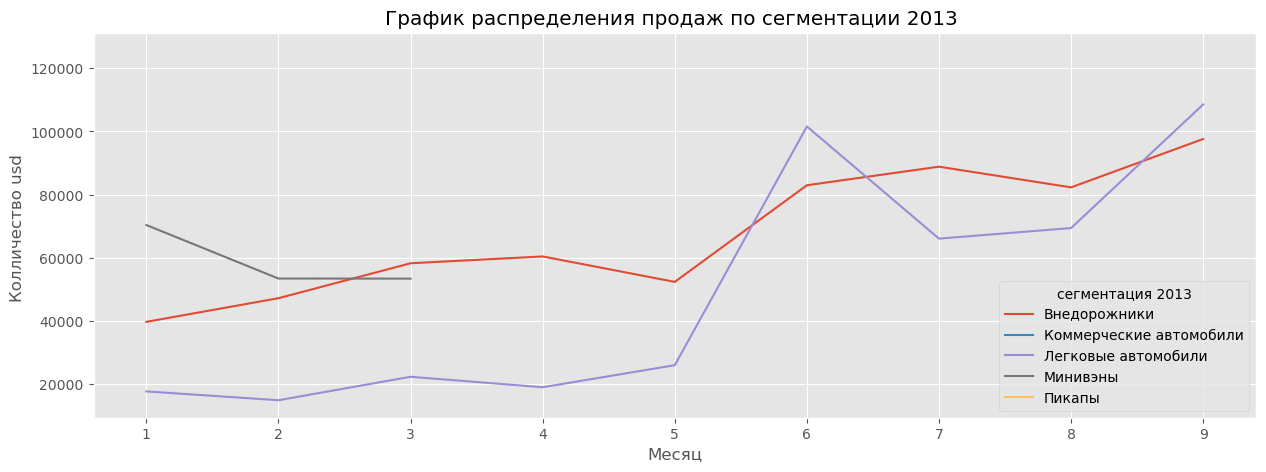

In [162]:
%matplotlib inline

mercur.pivot_table(
    index='месяц_1',  
    columns='сегментация 2013',  
    values='продажа, usd', 
    
).plot(figsize=(15, 5), grid=True).set_title('График распределения продаж по сегментации 2013 ')
plt.xlabel('Месяц')
plt.ylabel('Колличество usd ')
plt.show()

In [163]:
mercur['класс 2013'].value_counts(dropna=False)

B класс                   201
Полноразмерные SUV         67
Компактные SUV             67
F класс                    13
Среднеразмерные SUV        11
E класс                     9
C класс                     5
Полноразмерный Минивэн      5
D класс                     3
Спортивные автомобили       2
Микроавтобусы               2
Pick-ups                    1
Name: класс 2013, dtype: int64

In [164]:
mercur['сегментация eng'].value_counts(dropna=False)

B     201
K3     67
K1     67
F      13
K2     11
E       9
C       5
M       5
D       3
G2      2
L1      2
K4      1
Name: сегментация eng, dtype: int64

In [165]:
mercur['локализация производства'].value_counts(dropna=False)

Импорт    386
Name: локализация производства, dtype: int64

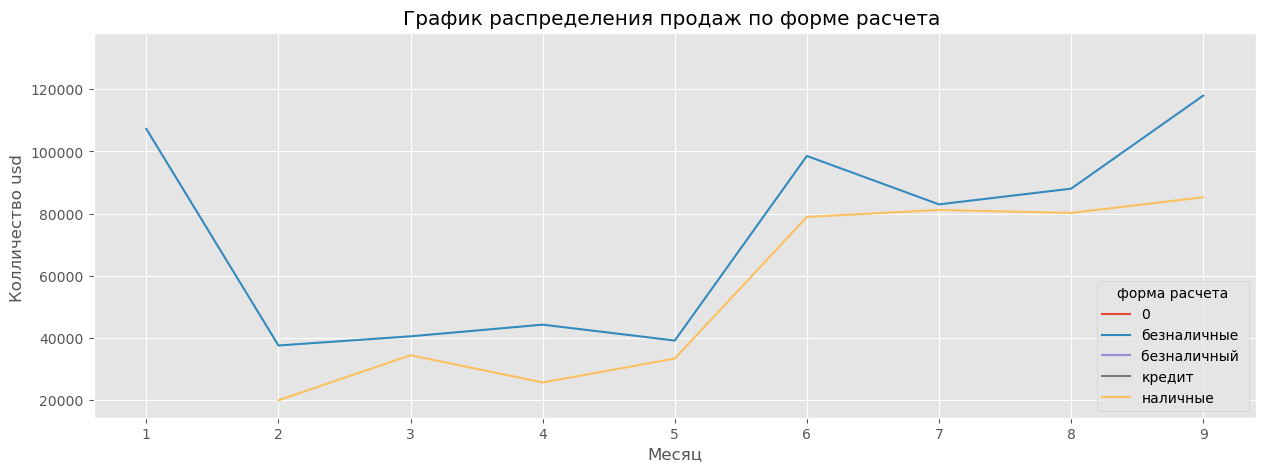

In [166]:
%matplotlib inline

mercur.pivot_table(
    index='месяц_1',  
    columns='форма расчета',  
    values='продажа, usd', 
    
).plot(figsize=(15, 5), grid=True).set_title('График распределения продаж по форме расчета ')
plt.xlabel('Месяц')
plt.ylabel('Колличество usd ')
plt.show()

In [167]:
# Вычисляем общую выручку
total_revenue_3 = mercur['количество'] * mercur['продажа, usd']

Общая выручка

In [168]:
print(total_revenue_3.sum())

16469318


Средняя выручка 

In [169]:
print(total_revenue_3.mean())

42666.62694300518


Ежемесячная выручка 

In [170]:
t = mercur.groupby('месяц_1',dropna=False)['продажа, usd'].agg(['sum','mean'])
t

,sum,mean
месяц_1,,
1,1415711,27759.039216
2,2415249,26252.706522
3,2383401,38441.951613
4,2414053,35500.779412
5,2351545,35629.469697
6,756811,94601.375000
7,1307886,81742.875000
8,1031434,79341.076923
9,1030846,103084.600000


Ежемесячная выручка по маркам 

In [171]:
mercur.pivot_table(index='месяц_1',columns='бренд',values='продажа, usd',aggfunc=['sum','count'])

sum                      count                   
бренд        Audi   Porsche Volkswagen  Audi Porsche Volkswagen
месяц_1                                                        
1        177771.0   89000.0  1148940.0   2.0     1.0       48.0
2         91904.0  554265.0  1769080.0   2.0     5.0       85.0
3        717757.0  652163.0  1013481.0   9.0     7.0       46.0
4        313650.0  767030.0  1333373.0   4.0     8.0       56.0
5        497499.0  834318.0  1019728.0   7.0     8.0       51.0
6        229867.0  526944.0        NaN   3.0     5.0        NaN
7        689927.0  617959.0        NaN   9.0     7.0        NaN
8        419645.0  611789.0        NaN   6.0     7.0        NaN
9        570800.0  460046.0        NaN   6.0     4.0        NaN

In [172]:
mercur.groupby(['месяц_1','бренд'],dropna=False)['продажа, usd'].agg(['sum','count'])

sum  count
месяц_1 бренд                     
1       Audi         177771      2
        Porsche       89000      1
        Volkswagen  1148940     48
2       Audi          91904      2
        Porsche      554265      5
        Volkswagen  1769080     85
3       Audi         717757      9
        Porsche      652163      7
        Volkswagen  1013481     46
4       Audi         313650      4
        Porsche      767030      8
        Volkswagen  1333373     56
5       Audi         497499      7
        Porsche      834318      8
        Volkswagen  1019728     51
6       Audi         229867      3
        Porsche      526944      5
7       Audi         689927      9
        Porsche      617959      7
8       Audi         419645      6
        Porsche      611789      7
9       Audi         570800      6
        Porsche      460046      4

Продажи по регионам

In [173]:
mercur.groupby('регион',dropna=False)['продажа, usd'].agg(['sum','count'])

,sum,count
регион,,
Алматы,11600584,245
Атырау,775432,42
Караганда,399334,21
Костанай,538794,13
Нур-Султан,1502142,51
Уральск,290650,14


Продажи по регионам - марки 

In [174]:
mercur.groupby(['регион','бренд'],dropna=False)['продажа, usd'].agg(['sum','count'])

sum  count
регион     бренд                     
Алматы     Audi        3090605     39
           Porsche     5040595     51
           Volkswagen  3469384    155
Атырау     Volkswagen   775432     42
Караганда  Volkswagen   399334     21
Костанай   Audi         153015      2
           Volkswagen   385779     11
Нур-Султан Audi         465200      7
           Porsche       72919      1
           Volkswagen   964023     43
Уральск    Volkswagen   290650     14

                                              Выводы 
                                              
- Лучший месяц выручки - Февраль

- Популярные бренды автомобилей - Volkswagen

- Модель - Polo

- Года выпуска - 2018

- Производства - РФ

- Вид топлива - Бензин

- Сегмента - легковой

- Лидирующие продажи г.Алматы

- В основном физические лица

- Покупки наличными

- Покупка одной машины в ценовой категории 15 873 т. долларов США

- В основном Легковые автомобили

- Импорт 



Общая выручка - 16 469 318 млн. долларов США

Средняя выручка - 42 667 т. долларов США

      На основании предоставленных данных, можно дать следующие рекомендации для МеркурАвто:

- Учитывая, что лучший месяц выручки - Февраль, рекомендуется провести анализ продаж в этом месяце, чтобы выявить факторы, способствующие увеличению выручки. Это может помочь в разработке маркетинговых стратегий и планировании будущих продаж.

- Популярность бренда Volkswagen и модели Polo 2018 года выпуска, произведенной в РФ, указывает на то, что эти автомобили пользуются спросом у клиентов. Рекомендуется продолжать продвигать эти модели и расширять их предложение в автосалонах.

- Учитывая, что большинство клиентов - физические лица, рекомендуется сосредоточиться на маркетинговых активностях, направленных на эту аудиторию. Например, проведение акций и скидок для физических лиц, а также предоставление выгодных условий кредитования.

- Рекомендуется обеспечить удобные условия для оплаты наличными, например, наличие кассы в автосалоне или возможность оплаты через терминал.

- Учитывая, что большинство клиентов покупают одну машину в ценовой категории 15 873 т. долларов США, рекомендуется предложить дополнительные услуги или аксессуары, которые могут быть интересны этим клиентам. Например, страхование автомобиля, установка дополнительного оборудования или предоставление гарантийного обслуживания.

- Учитывая, что большинство клиентов покупают легковые автомобили, рекомендуется продолжать развивать предложение легковых автомобилей и предлагать новые модели и бренды.

- Учитывая, что большинство автомобилей импортируются, рекомендуется уделить внимание оптимизации процесса импорта и логистики, чтобы обеспечить своевременную доставку автомобилей клиентам.


Эти рекомендации основаны на предоставленных данных и могут помочь МеркурАвто улучшить свои продажи и удовлетворить потребности клиентов.

In [175]:
df

,год,месяц,компания,бренд,модель,модификация,год выпуска,страна-производитель,вид топлива,"объём двиг, л,",...,форма расчета,количество,"цена, usd","продажа, usd",область,сегментация 2013,класс 2013,сегментация eng,локализация производства,месяц_1
0,2019,Май,Mercur Auto,Audi,A3,TFSI,2018,Германия,Бензин,"1,4",...,безналичные,1,28115,28115,г.Алматы,Легковые автомобили,C класс,C,Импорт,5
1,2019,Август,Mercur Auto,Audi,A3,TFSI,2018,Германия,Бензин,"1,4",...,наличные,1,32246,32247,г.Алматы,Легковые автомобили,C класс,C,Импорт,8
2,2019,Апрель,Mercur Auto,Audi,A4,TFSI,2018,Германия,Бензин,"1,4",...,безналичные,1,32000,32000,г.Алматы,Легковые автомобили,D класс,D,Импорт,4
3,2019,Июль,Mercur Auto,Audi,A4,TFSI,2018,Германия,Бензин,"1,4",...,безналичные,1,31929,31929,г.Алматы,Легковые автомобили,D класс,D,Импорт,7
4,2019,Июль,Mercur Auto,Audi,A4,TFSI,2018,Германия,Бензин,"1,4",...,наличные,1,31929,31929,г.Алматы,Легковые автомобили,D класс,D,Импорт,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21254,2019,Сентябрь,Renault Россия,Renault,Arkana,B34M3TX5C,2019,Российская Федерация,0,0,...,0,1,21275,21276,Атырауская область,Внедорожники,Компактные SUV,K1,Импорт,9
21255,2019,Январь,Scandinavian Motors,Volvo,V90,V90CC Pro,2018,Швеция,Бензин,2.0,...,0,1,59199,59200,г.Алматы,Легковые автомобили,E класс,E,Импорт,1
21256,2019,Апрель,Scandinavian Motors,Volvo,V90,V90CC Pro,2019,Швеция,Бензин,2,...,безналичные,1,56646,56646,г.Алматы,Легковые автомобили,E класс,E,Импорт,4
21257,2019,Сентябрь,Scandinavian Motors,Volvo,V90,V90CC Pro,2019,Швеция,Бензин,2.0,...,наличные,1,60256,60256,г.Алматы,Легковые автомобили,E класс,E,Импорт,9


In [176]:
df.columns

Index(['год', 'месяц', 'компания', 'бренд', 'модель', 'модификация',
       'год выпуска', 'страна-производитель', 'вид топлива', 'объём двиг, л,',
       'коробка передач', 'тип привода', 'сегмент', 'регион',
       'наименование дилерского центра', 'тип клиента', 'форма расчета',
       'количество', 'цена, usd', 'продажа, usd', 'область',
       'сегментация 2013', 'класс 2013', 'сегментация eng',
       'локализация производства', 'месяц_1'],
      dtype='object')

                                            Гипотезы

Нулевая гипотеза: стоимость автомобиля зависит от уровня развития региона (средней заработной платы по региону)

Альтернативная гипотеза: стоимость автомобиля не зависит от уровня развития региона (средней заработной платы по региону)

In [177]:
df['область'].value_counts(dropna=False)

г.Алматы                          4909
г.Нур-Султан                      3777
Карагандинская область            1448
Южно-Казахстанская область        1447
Костанайская область              1421
Атырауская область                1272
Восточно-Казахстанская область    1167
Западно-Казахстанская область     1056
Актюбинская область                964
Павлодарская область               958
Мангистауская область              846
Северо-Казахстанская область       439
Кызылординская область             417
Акмолинская область                366
Экспорт область                    331
Алматинская область                251
Жамбылская область                 172
Туркестанская область               18
Name: область, dtype: int64

In [187]:
df.dtypes

год                                int64
месяц                             object
компания                          object
бренд                             object
модель                            object
модификация                       object
год выпуска                       object
страна-производитель              object
вид топлива                       object
объём двиг, л,                    object
коробка передач                   object
тип привода                       object
сегмент                           object
регион                            object
наименование дилерского центра    object
тип клиента                       object
форма расчета                     object
количество                         int32
цена, usd                          int32
продажа, usd                       int32
область                           object
сегментация 2013                  object
класс 2013                        object
сегментация eng                   object
локализация прои

In [185]:
pd.DataFrame(df.isna().mean().to_frame(name='Пропуски').query('Пропуски > 0')['Пропуски'])\
            .style.background_gradient('coolwarm')\
            .format({'Пропуски':'{:.0%}'})

,Пропуски


In [180]:
def средняя_зп(row):
    try:
        if 'г.Алматы' in row:
            return'362'
        elif 'г.Нур-Султан' in row:
            return '410'
        elif 'Карагандинская область' in row:
            return '308'
        elif 'Южно-Казахстанская область' in row:
            return '283'
        elif 'Костанайская область' in row:
            return '287'
        elif 'Атырауская область' in row:
            return '301'
        elif 'Восточно-Казахстанская область' in row:
            return '293'
        elif 'Западно-Казахстанская область' in row:
            return '269'
        elif 'Актюбинская область' in row:
            return '280'
        elif 'Павлодарская область' in row:
            return '272'
        elif 'Мангистауская область' in row:
            return '259'
        elif 'Северо-Казахстанская область' in row:
            return '299'
        elif 'Кызылординская область' in row:
            return '250'
        elif 'Акмолинская область' in row:
            return '285'
        elif 'Алматинская область' in row:
            return '275'
        elif 'Жамбылская область' in row:
            return '272'
        elif 'Туркестанская область' in row:
            return '283'
    except:
        return 'Экспорт область'

In [181]:
df['средняя_зп'] = df['область'].apply(средняя_зп)

In [182]:
df['средняя_зп'] = df['средняя_зп'].fillna(0)

In [188]:
df['средняя_зп'] = df['средняя_зп'].astype('int')

In [189]:
print(df['средняя_зп'].corr(df['цена, usd']))

0.13074455923285033


In [190]:
corr = df.pivot_table(index='средняя_зп',columns='область',values='цена, usd', aggfunc='mean')

<AxesSubplot:xlabel='область', ylabel='средняя_зп'>

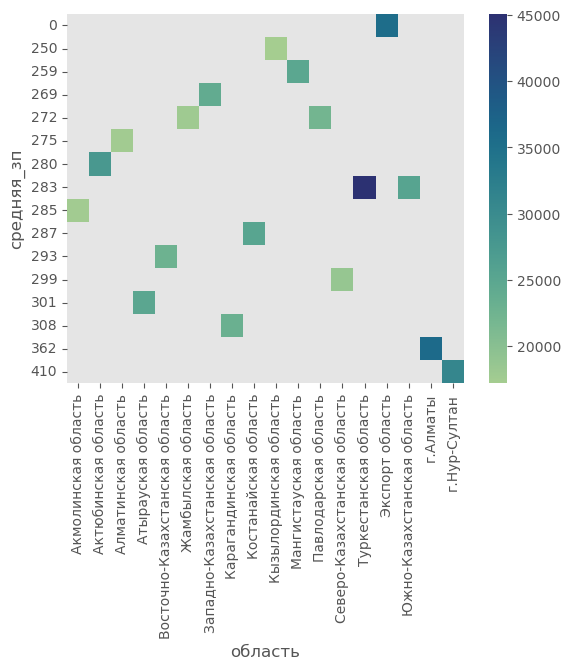

In [191]:
sns.heatmap(corr, cmap="crest")

Вывод - стоимость автомобиля зависит от уровня развития региона (средней заработной платы по региону)

Таблица с моделями , количеством покупок этой модели, суммы продаж и средней цены на покупку

In [192]:
model = df.groupby('модель',dropna=False)['продажа, usd'].agg(['count','sum', 'mean'])
model.head(50)

,count,sum,mean
модель,,,
2206,101,2102478,20816.613861
2217,3,69546,23182.000000
2310,27,318840,11808.888889
2705,113,2020647,17881.831858
2752,28,473744,16919.428571
3,7,230597,32942.428571
300,34,2167048,63736.705882
301,21,275905,13138.333333
3151,46,1576015,34261.195652


In [193]:
df = df.drop(index= 15137)

In [194]:
df['продажа, usd'].agg(['min', 'max'])

min          0
max    3778206
Name: продажа, usd, dtype: int64

In [195]:
df['продажа, usd'].value_counts(dropna=False).head(30)

13800    228
9885     184
11600    174
27600    123
23200    106
9894      99
22600     88
7100      82
18700     82
41400     75
20700     75
14200     74
11300     68
34800     68
30400     67
12636     67
17500     67
28375     62
9969      62
20130     61
35588     58
12534     57
12482     56
13500     56
12601     54
12468     52
12549     49
10536     48
20558     47
27000     46
Name: продажа, usd, dtype: int64

Таблица с количеством проданных моделей 

In [196]:
summa = df.groupby('модель',dropna=False)['количество'].agg(['sum', 'mean'])
summa.head(50)

,sum,mean
модель,,
2206,144,1.425743
2217,3,1.000000
2310,27,1.000000
2705,113,1.000000
2752,28,1.000000
3,8,1.142857
300,51,1.500000
301,21,1.000000
3151,128,2.782609


                        Выводы по общему анализу рынка автомобилей Казахстана


- Лучшие месяцы выручки - Май, Апрель, Июль

- Среди компаний лидируют - Toyota Motor Kazakhstan, Astana Motors, БИПЭК АВТО

- Популярные бренды автомобилей - Hyundai, Toyota, Lada

- Модели - Tucson, Accent, Camry

- Года выпуска - 2018 и 2019

- Производства - Казахстан, РФ

- Вид топлива - Бензин

- Тип привода - 4WD и 2WD

- Сегмента - В и С

- Лидирующие продажи в городах г.Алматы и г.Нур-Султан

- Больше всего продаж в диллерских центрах - Hyundai Auto Almaty, Hyundai Premium Almaty, Автомир-Центр Караганда

- В основном физические лица

- Покупки в кредит или по безналичному расчету

- Покупка одной машины в ценовой категории 13800 доллар США

- В основном внедорожники

- Импорт и Локальное производство почти равны

- Общая выручка - 4 229 072 521 мллиарда долларов США

- Средняя выручка - 198 931 тысяч долларов США

                              Выводы по анализу коммерческого транспорта 
                              
- Лучшие месяцы выручки - Май, Июль, Апрель

- Среди компаний лидируют - Вираж, ТК КАМАЗ, БИПЭК АВТО

- Популярные бренды автомобилей - GAZ, UAZ, KAMAZ

- Модель - 3302

- Года выпуска - 2019

- Производства - РФ и РК

- Вид топлива - Бензин

- Тип привода - Задний

- Сегмента - Грузовой автомобиль

- Лидирующие продажи в г.Алматы

- Больше всего продаж в диллерском центре - Вираж Алматы

- В основном юридические лица

- Покупки по безналичному расчету

- Покупка одной машины в ценовой категории 11200 и 14200 доллар США

- В основном Малотоннажные грузовики

- Импорт

- Общая выручка - 810 714 285 млн. долларов США

- Средня выручка - 312 534 т. долларов США

                              Выводы по анализу некоммерческого транспорта 


- Лучшие месяцы выручки - Апрель, Июль, Июнь

- Среди компаний лидируют - Toyota Motor Kazakhstan, Astana Motors, БИПЭК АВТО  

- Популярные бренды автомобилей - Hyundai, Toyota

- Модель - Tucson, Accent, Camry

- Года выпуска - 2019

- Производства - РФ и РК

- Вид топлива - Бензин

- Тип привода - 4WD

- Сегмента - B

- Лидирующие продажи в Алматы , Нур-Султан

- Больше всего продаж в диллерском центре - Hyundai Premium Almaty , Автомир-Центр Караганда, Hyundai Premium Astana

- В основном физические  лица

- Покупки в кредит и наличными 

- Покупка одной машины в ценовой категории 13800 доллар США

- В основном внедорожники

- Импорт и локальное производство на равне

- Общая выручка - 3 418 358 236 миллиарда долларов США

- Средняя выручка - 183 142 т. долларов США

                                Выводы по анализу позиции Меркур Авто

- Лучший месяц выручки - Февраль

- Популярные бренды автомобилей - Volkswagen

- Модель - Polo

- Года выпуска - 2018

- Производства - РФ

- Вид топлива - Бензин

- Сегмента - легковой

- Лидирующие продажи г.Алматы

- В основном физические лица

- Покупки наличными

- Покупка одной машины в ценовой категории 15 873 т. долларов США

- В основном Легковые автомобили

- Импорт 

- Общая выручка - 16 469 318 млн. долларов США

- Средняя выручка - 42 667 т. долларов США

Стоимость автомобиля зависит от уровня развития региона (средней заработной платы по региону)

           На основании предоставленных данных, можно дать следующие рекомендации для МеркурАвто:
           
- Учитывая, что лучший месяц выручки - Февраль, рекомендуется провести анализ продаж в этом месяце, чтобы выявить факторы, способствующие увеличению выручки. Это может помочь в разработке маркетинговых стратегий и планировании будущих продаж.

- Популярность бренда Volkswagen и модели Polo 2018 года выпуска, произведенной в РФ, указывает на то, что эти автомобили пользуются спросом у клиентов. Рекомендуется продолжать продвигать эти модели и расширять их предложение в автосалонах.

- Большинство клиентов - физические лица, рекомендуется сосредоточиться на маркетинговых активностях, направленных на эту аудиторию. Например, проведение акций и скидок для физических лиц, а также предоставление выгодных условий кредитования.

- Рекомендуется обеспечить удобные условия для оплаты наличными, например, наличие кассы в автосалоне или возможность оплаты через терминал.

- Большинство клиентов покупают одну машину в ценовой категории 15 873 т. долларов США, рекомендуется предложить дополнительные услуги или аксессуары, которые могут быть интересны этим клиентам. Например, страхование автомобиля, установка дополнительного оборудования или предоставление гарантийного обслуживания.

- Учитывая, что большинство клиентов покупают легковые автомобили, рекомендуется продолжать развивать предложение легковых автомобилей и предлагать новые модели и бренды.

- Большинство автомобилей импортируются, рекомендуется уделить внимание оптимизации процесса импорта и логистики, чтобы обеспечить своевременную доставку автомобилей клиентам.

- Сделать упор на некоммерческий транспорт

 Эти рекомендации основаны на предоставленных данных и могут помочь МеркурАвто улучшить свои продажи и удовлетворить потребности клиентов.